<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [3]:
#Importation de la librairie Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import datetime as dt

In [4]:
#Importation de la librairie plotly express
import plotly.express as px

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargement des fichiers</h3>
</div>

In [6]:
#Importation du fichier web.csv
df_transactions = pd.read_csv('Transactions.csv', sep=';')

#Importation du fichier erp.csv
df_customers = pd.read_csv('customers.csv', sep=';')

#importation du fichier liaison.csv
df_products = pd.read_csv('products.csv', sep=';')

C:\Users\Eliane CAMUS\AppData\Local\Temp\ipykernel_11960\3100188889.py:2: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_transactions = pd.read_csv('Transactions.csv', sep=';')


In [7]:
#Affichage dataframe transactions
display(df_transactions)

id_prod                        date session_id client_id
0        0_1259  2021-03-01 00:01:07.843138        s_1     c_329
1        0_1390  2021-03-01 00:02:26.047414        s_2     c_664
2        0_1352  2021-03-01 00:02:38.311413        s_3     c_580
3        0_1458  2021-03-01 00:04:54.559692        s_4    c_7912
4        0_1358  2021-03-01 00:05:18.801198        s_5    c_2033
...         ...                         ...        ...       ...
1048570     NaN                         NaN        NaN       NaN
1048571     NaN                         NaN        NaN       NaN
1048572     NaN                         NaN        NaN       NaN
1048573     NaN                         NaN        NaN       NaN
1048574     NaN                         NaN        NaN       NaN

[1048575 rows x 4 columns]

In [8]:
#Affichage dataframe customers
display(df_customers)

client_id sex  birth
0       c_4410   f   1967
1       c_7839   f   1975
2       c_1699   f   1984
3       c_5961   f   1962
4       c_5320   m   1943
...        ...  ..    ...
8616    c_7920   m   1956
8617    c_7403   f   1970
8618    c_5119   m   1974
8619    c_5643   f   1968
8620      c_84   f   1982

[8621 rows x 3 columns]

In [9]:
#Affichage dataframe products
display(df_products)

id_prod   price  categ
0     0_1421   19.99      0
1     0_1368    5.13      0
2      0_731   17.99      0
3      1_587    4.99      1
4     0_1507    3.99      0
...      ...     ...    ...
3281    2_23  115.99      2
3282   0_146   17.14      0
3283   0_802   11.22      0
3284   1_140   38.56      1
3285  0_1920   25.16      0

[3286 rows x 3 columns]

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

Dans cette étape nous allons effectuer les actions suivantes :
- Vérification du nombre de lignes et de colonnes
- Vérification des typologies de chaque variable => conversion si besoin
- Recherche de valeurs manquantes et de lignes Nan => remplacement ou suppression selon le cas
- Identification et suppression des doublons
- Identification des outliers (valeurs abhérantes)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier transactions.csv</h3>
</div>

In [13]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_transactions.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_transactions.shape[1]))

Le tableau comporte 1048575 observation(s) ou article(s)
Le tableau comporte 4 colonne(s)


In [14]:
#Nature des données
df_transactions.dtypes

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

La date est de type object : nous allons convertir la date en format date pour pouvoir l'exploiter
La date s'affiche sous le format suivant : '%Y-%m-%d %H:%M:%S.%f'

In [16]:
df_transactions['date']

0          2021-03-01 00:01:07.843138
1          2021-03-01 00:02:26.047414
2          2021-03-01 00:02:38.311413
3          2021-03-01 00:04:54.559692
4          2021-03-01 00:05:18.801198
                      ...            
1048570                           NaN
1048571                           NaN
1048572                           NaN
1048573                           NaN
1048574                           NaN
Name: date, Length: 1048575, dtype: object

In [17]:
#Changement colonne Date du format object vers format datetime
#Exemple : pd.to_datetime('2018-10-26 12:00:00.0000000011',format='%Y-%m-%d %H:%M:%S.%f')

df_transactions['date'] = pd.to_datetime(df_transactions['date'], format='%Y-%m-%d %H:%M:%S.%f')

In [18]:
#Vérification de la nature des données après conversion colonne Date du format object vers datetime
df_transactions.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
dtype: object

In [19]:
#Nombre de valeurs manquantes par colonne
df_transactions.isnull().sum()

id_prod       361041
date          361041
session_id    361041
client_id     361041
dtype: int64

In [20]:
#Suppression des lignes NaN
df_transactions.drop(df_transactions[(df_transactions["id_prod"].isna()) & (df_transactions["date"].isna()) & (df_transactions["session_id"].isna()) & (df_transactions["client_id"].isna())].index, inplace = True)
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687534 entries, 0 to 687533
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     687534 non-null  object        
 1   date        687534 non-null  datetime64[ns]
 2   session_id  687534 non-null  object        
 3   client_id   687534 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 21.0+ MB


In [21]:
#Vérification des dimensions du dataset après suppression des lignes NaN
print("Le tableau comporte {} observation(s) ou article(s)".format(df_transactions.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_transactions.shape[1]))

Le tableau comporte 687534 observation(s) ou article(s)
Le tableau comporte 4 colonne(s)


In [22]:
#Nombre de valeurs présentes dans chacune des colonnes
df_transactions.count()

id_prod       687534
date          687534
session_id    687534
client_id     687534
dtype: int64


Identification de doublons sur la colonne "date" => Est-ce normal d'avoir des doublons ? 

Doublons possibles sur colonnes "session_id", "id_prod" et "client_id" car c'est un historique des transactions.

In [24]:
#Identification des doublons : colonne "date"
df_transactions['date'].is_unique
#Présence de doublons sur la date : possibilité d'avoir des transactions simultanées

False

In [25]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
df_transactions.describe()

date
count                         687534
mean   2022-03-01 21:24:00.618519296
min       2021-03-01 00:01:07.843138
25%    2021-09-10 10:35:20.642323456
50%    2022-02-27 06:50:25.400120064
75%    2022-08-28 22:16:49.841665536
max       2023-02-28 23:58:30.792755

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier customers.csv</h3>
</div>

In [27]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_customers.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_customers.shape[1]))

Le tableau comporte 8621 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [28]:
#Nature des données
df_customers.dtypes

client_id    object
sex          object
birth         int64
dtype: object

In [29]:
#Nombre de valeurs manquantes par colonne
df_customers.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [30]:
#Nombre de valeurs présentes dans chacune des colonnes
df_customers.count()

client_id    8621
sex          8621
birth        8621
dtype: int64

Recherche de doublons uniquement sur la colonne "client_id" qui est l'identification client qui doit être unique 
(le genre et l'année de naissance peuvent être en double)

In [32]:
#Identification des doublons : colonne "client_id"
df_customers['client_id'].is_unique
#True => pas de doublons

True

In [33]:
#Liste des valeurs uniques : colonne "sex"
pd.unique(df_customers['sex'])

array(['f', 'm'], dtype=object)

In [34]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
df_customers.describe()

birth
count  8621.000000
mean   1978.275606
std      16.917958
min    1929.000000
25%    1966.000000
50%    1979.000000
75%    1992.000000
max    2004.000000

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier products.csv</h3>
</div>

In [36]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_products.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_products.shape[1]))

Le tableau comporte 3286 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [37]:
#Nature des données
df_products.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

In [38]:
#Nombre de valeurs manquantes par colonne
df_products.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [39]:
#Nombre de valeurs présentes dans chacune des colonnes
df_products.count()

id_prod    3286
price      3286
categ      3286
dtype: int64

Recherche de doublons uniquement sur la colonne "id_prod" qui constitue l'indentifiant unique de chaque produit vendu
(le prix et la catégorie peuvent être en double)

In [41]:
#Identification des doublons : colonne "id_prod"
df_products['id_prod'].is_unique
#True => aucun doublon

True

In [42]:
#Liste des valeurs uniques : colonne "categ"
pd.unique(df_products['categ'])

array([0, 1, 2], dtype=int64)

In [43]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
df_products.describe()

price        categ
count  3286.000000  3286.000000
mean     21.863597     0.370359
std      29.849786     0.615446
min       0.620000     0.000000
25%       6.990000     0.000000
50%      13.075000     0.000000
75%      22.990000     1.000000
max     300.000000     2.000000

Colonne "price" : Les prix vont de 0.62 à 300€. Pas de prix négatifs. Nous allons par la suite calculer la borne d'outliers. 
Colonne "categ" : Nous allons modifier les catégories en type string pour éviter toute confusion. 

In [45]:
#Conversion colonne "categ " d'un type int64 à un type string pour éviter que la variable soit détectée comme une donnée chiffrée dans la fonction describe
#Affichage de l'ensemble des valeurs de la variable "categ"
df_products['categ'].unique()

array([0, 1, 2], dtype=int64)

In [46]:
#Remplacement des chiffres par une nouvelle désignation de catégorie
df_products.loc[df_products['categ']== 0, 'categ']='Categ_0'
df_products.loc[df_products['categ']== 1, 'categ']='Categ_1'
df_products.loc[df_products['categ']== 2, 'categ']='Categ_2'

C:\Users\Eliane CAMUS\AppData\Local\Temp\ipykernel_11960\201676431.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Categ_0' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_products.loc[df_products['categ']== 0, 'categ']='Categ_0'


In [47]:
#Vérification du type de la variable "categ" après modification des valeurs
df_products.dtypes

id_prod     object
price      float64
categ       object
dtype: object

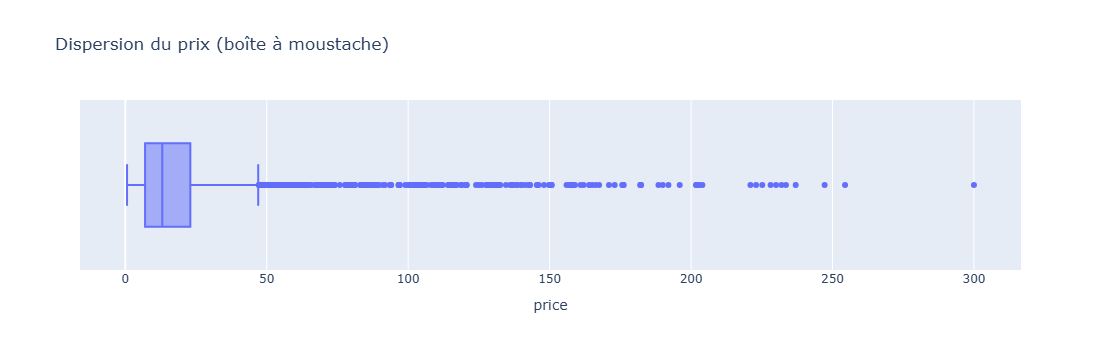

In [48]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas
dispersion_prix_plt = px.box(df_products, x="price", width=1000, height=350, title="Dispersion du prix (boîte à moustache)")
dispersion_prix_plt.show()

#Outliers sur les prix supérieurs à 47.69€ d'après le graphique de dispersion généré via plotly express.

Calcul manuel de la borne supérieure du boxplot

In [50]:
# Calcul du 1er quartile
Q1 = np.percentile(df_products["price"], 25)
print("Q1 :",Q1)
# Calcul du 3e quartile
Q3 = np.percentile(df_products["price"], 75)
print("Q3 :",Q3)
# Calcul de l'écart interquartile
IQ = Q3 - Q1
print("IQ :",IQ)

#Calcul de la borne inférieure du boxplot
borne_inf_boxplot_price = round(Q1-1.5*IQ,2)
print("Valeur de la borne inférieure du boxplot :",borne_inf_boxplot_price,"€")

#Calcul de la borne supérieure du boxplot
borne_sup_boxplot_price = round(Q3+1.5*IQ,2)
print("Valeur de la borne supérieure du boxplot :",borne_sup_boxplot_price,"€")

#Outliers sur les prix supérieurs à 46.99€ via les calculs avec Pandas.

Q1 : 6.99
Q3 : 22.99
IQ : 15.999999999999998
Valeur de la borne inférieure du boxplot : -17.01 €
Valeur de la borne supérieure du boxplot : 46.99 €


In [51]:
#Affichage des outliers > 46.99€

outliers_borne_sup = df_products.loc[(df_products['price'] > borne_sup_boxplot_price)].sort_values(by='price', ascending=False).head(20)
print("Nombre d'outliers > 46.99€ :",outliers_borne_sup['price'].count(),"valeurs.")
outliers_borne_sup

Nombre d'outliers > 46.99€ : 20 valeurs.


id_prod   price    categ
946      2_2  300.00  Categ_2
724     2_76  254.44  Categ_2
394    2_158  247.22  Categ_2
1435   2_167  236.99  Categ_2
2778    2_30  233.54  Categ_2
1959   2_125  231.99  Categ_2
2486   2_166  230.04  Categ_2
785     2_40  228.11  Categ_2
10     2_228  225.17  Categ_2
1895     2_4  222.97  Categ_2
1708    2_87  220.99  Categ_2
1283   2_211  203.99  Categ_2
2463     2_3  202.99  Categ_2
3162    2_11  201.99  Categ_2
95     2_128  201.74  Categ_2
2992   2_235  195.99  Categ_2
969      2_5  191.99  Categ_2
1674   2_213  189.99  Categ_2
2471   2_156  188.48  Categ_2
2163    2_90  182.30  Categ_2

300 outliers sur 3286 prix au total => 9.13% d'outliers.

Nous n'avons pas plus d'informations sur les produits mais nous constatons que les 20 produits les plus chers sont tous dans la Catégorie n°2.

Nous décidons de conserver l'intégralité des produits de la liste. 

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_transactions et df_products</h3>
</div>

In [55]:
#Fusion des fichiers df_transactions et df_products
#Y a t-il des lignes ne "matchant" pas  entre les 2 fichiers?

df_transactions_products_test = pd.merge(df_transactions, df_products, how="outer",on="id_prod", indicator=True)     #indicator=True pour savoir si la ligne est retenue dans les 2 dataframes initiaux pour la jointure (si oui valeur = "both"). Fonctionne avec un outer uniquement.
display(df_transactions_products_test)

id_prod                       date session_id client_id  price  \
0          0_0 2021-03-01 13:45:51.575117      s_282    c_5152   3.75   
1          0_0 2021-03-02 06:42:55.351333      s_621    c_2917   3.75   
2          0_0 2021-03-02 18:49:49.651862      s_852    c_3988   3.75   
3          0_0 2021-03-02 21:57:33.862118      s_908    c_1004   3.75   
4          0_0 2021-03-03 23:59:48.997483     s_1379     c_278   3.75   
...        ...                        ...        ...       ...    ...   
687550    2_99 2022-05-21 01:53:46.967570   s_211661    c_5828  84.99   
687551    2_99 2022-07-21 01:53:46.967570   s_241374    c_5828  84.99   
687552    2_99 2022-11-11 20:56:49.820935   s_296127    c_7135  84.99   
687553    2_99 2022-12-11 20:56:49.820935   s_310606    c_7135  84.99   
687554    2_99 2023-01-21 01:53:46.967570   s_329932    c_5828  84.99   

          categ _merge  
0       Categ_0   both  
1       Categ_0   both  
2       Categ_0   both  
3       Categ_0   both  
4       Categ_0   both  
...         ...    ...  
687550  Categ_2   both  
687551  Categ_2   both  
687552  Categ_2   both  
687553  Categ_2   both  
687554  Categ_2   both  

[687555 rows x 7 columns]

In [56]:
#Afficher les résultats différents de "both" en colonne "_merge"
display(df_transactions_products_test[df_transactions_products_test["_merge"]!="both"])

id_prod date session_id client_id   price    categ      _merge
6073    0_1014  NaT        NaN       NaN    1.15  Categ_0  right_only
6511    0_1016  NaT        NaN       NaN   35.06  Categ_0  right_only
8723    0_1025  NaT        NaN       NaN   24.99  Categ_0  right_only
21687   0_1062  NaT        NaN       NaN   20.08  Categ_0  right_only
40971   0_1119  NaT        NaN       NaN    2.99  Categ_0  right_only
94245   0_1318  NaT        NaN       NaN   20.92  Categ_0  right_only
297077  0_1620  NaT        NaN       NaN    0.80  Categ_0  right_only
299185  0_1624  NaT        NaN       NaN   24.50  Categ_0  right_only
311123  0_1645  NaT        NaN       NaN    2.99  Categ_0  right_only
323013  0_1780  NaT        NaN       NaN    1.67  Categ_0  right_only
325137  0_1800  NaT        NaN       NaN   22.05  Categ_0  right_only
387651  0_2308  NaT        NaN       NaN   20.28  Categ_0  right_only
389726   0_299  NaT        NaN       NaN   22.99  Categ_0  right_only
390221   0_310  NaT        NaN       NaN    1.94  Categ_0  right_only
390689   0_322  NaT        NaN       NaN    2.99  Categ_0  right_only
397070   0_510  NaT        NaN       NaN   23.66  Categ_0  right_only
415475     1_0  NaT        NaN       NaN   31.82  Categ_1  right_only
514820   1_394  NaT        NaN       NaN   39.73  Categ_1  right_only
685998    2_72  NaT        NaN       NaN  141.32  Categ_2  right_only
686501    2_86  NaT        NaN       NaN  132.36  Categ_2  right_only
686502    2_87  NaT        NaN       NaN  220.99  Categ_2  right_only

21 valeurs ressortent en "right_only" : elles sont présentes dans la base "df_products" mais pas la base "df_transactions". Ce sont les produits qui sont dans la base mais qui n'ont pas été achetés entre 2021 et 2023.

Comme nous souhaitons analyser les données de transactions uniquement, nous allons procéder à une fusion de type "inner" pour pouvoir conserver uniquement les données de transactions avec le prix de vente et la catégorie associée au produit. 

In [58]:
#Jointure de typer inner entre les tables df_transactions et df_products, sur la clé commune "id_prod"
df_transactions_products = pd.merge(df_transactions, df_products, how="inner",on="id_prod")
display(df_transactions_products)

id_prod                       date session_id client_id  price    categ
0       0_1259 2021-03-01 00:01:07.843138        s_1     c_329  11.99  Categ_0
1       0_1390 2021-03-01 00:02:26.047414        s_2     c_664  19.37  Categ_0
2       0_1352 2021-03-01 00:02:38.311413        s_3     c_580   4.50  Categ_0
3       0_1458 2021-03-01 00:04:54.559692        s_4    c_7912   6.55  Categ_0
4       0_1358 2021-03-01 00:05:18.801198        s_5    c_2033  16.49  Categ_0
...        ...                        ...        ...       ...    ...      ...
687529   1_508 2023-02-28 23:49:03.148402   s_348444    c_3573  21.92  Categ_1
687530    2_37 2023-02-28 23:51:29.318531   s_348445      c_50  48.99  Categ_2
687531   1_695 2023-02-28 23:53:18.929676   s_348446     c_488  26.99  Categ_1
687532  0_1547 2023-02-28 23:58:00.107815   s_348447    c_4848   8.99  Categ_0
687533  0_1398 2023-02-28 23:58:30.792755   s_348435    c_3575   4.52  Categ_0

[687534 rows x 6 columns]

In [59]:
df_transactions_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687534 entries, 0 to 687533
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     687534 non-null  object        
 1   date        687534 non-null  datetime64[ns]
 2   session_id  687534 non-null  object        
 3   client_id   687534 non-null  object        
 4   price       687534 non-null  float64       
 5   categ       687534 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 31.5+ MB


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_transactions_products et df_customers</h3>
</div>

In [61]:
#Recherche des non-correspondances entre la base "df_transactions_products" et "df_customers"

df_transactions_products_customers_test = pd.merge(df_transactions_products, df_customers, how="outer",on="client_id", indicator=True)        #indicator=True pour savoir si la ligne est retenue dans les 2 dataframes initiaux pour la jointure (si oui valeur = "both"). Fonctionne avec un outer uniquement.
display(df_transactions_products_customers_test)

id_prod                       date session_id client_id  price  \
0       0_1470 2021-06-11 21:02:39.382765    s_47346       c_1  19.53   
1        0_513 2021-07-21 22:41:38.769525    s_65433       c_1  11.99   
2       0_1186 2021-07-25 12:17:34.446678    s_66947       c_1  12.30   
3       0_1448 2021-07-26 17:37:29.438136    s_67467       c_1  18.94   
4       0_1475 2021-07-27 10:30:00.293075    s_67769       c_1  11.99   
...        ...                        ...        ...       ...    ...   
687550  0_1360 2023-01-15 17:53:15.077669   s_327362     c_999   4.33   
687551   1_351 2023-01-21 17:16:06.807620   s_330231     c_999  28.99   
687552   1_727 2023-01-21 17:40:50.856434   s_330231     c_999  16.99   
687553  0_1442 2023-01-28 13:12:42.429052   s_333631     c_999   4.89   
687554   1_676 2023-02-10 23:59:59.414026   s_339757     c_999  19.50   

          categ sex  birth _merge  
0       Categ_0   m   1955   both  
1       Categ_0   m   1955   both  
2       Categ_0   m   1955   both  
3       Categ_0   m   1955   both  
4       Categ_0   m   1955   both  
...         ...  ..    ...    ...  
687550  Categ_0   m   1964   both  
687551  Categ_1   m   1964   both  
687552  Categ_1   m   1964   both  
687553  Categ_0   m   1964   both  
687554  Categ_1   m   1964   both  

[687555 rows x 9 columns]

In [62]:
#Afficher les résultats différents de "both" en colonne "_merge"
display(df_transactions_products_customers_test[df_transactions_products_customers_test["_merge"]!="both"])

id_prod date session_id client_id  price categ sex  birth      _merge
18399      NaN  NaT        NaN    c_1223    NaN   NaN   m   1963  right_only
167262     NaN  NaT        NaN    c_2706    NaN   NaN   f   1967  right_only
191551     NaN  NaT        NaN    c_3017    NaN   NaN   f   1992  right_only
225851     NaN  NaT        NaN    c_3443    NaN   NaN   m   1959  right_only
240172     NaN  NaT        NaN    c_3526    NaN   NaN   m   1956  right_only
261001     NaN  NaT        NaN    c_3789    NaN   NaN   f   1997  right_only
282271     NaN  NaT        NaN    c_4086    NaN   NaN   f   1992  right_only
305952     NaN  NaT        NaN    c_4358    NaN   NaN   m   1999  right_only
309172     NaN  NaT        NaN    c_4406    NaN   NaN   f   1998  right_only
312791     NaN  NaT        NaN    c_4447    NaN   NaN   m   1956  right_only
380504     NaN  NaT        NaN    c_5223    NaN   NaN   m   2003  right_only
381688     NaN  NaT        NaN    c_5245    NaN   NaN   f   2004  right_only
434945     NaN  NaT        NaN     c_587    NaN   NaN   m   1993  right_only
519107     NaN  NaT        NaN    c_6735    NaN   NaN   m   2004  right_only
528931     NaN  NaT        NaN    c_6862    NaN   NaN   f   2002  right_only
534744     NaN  NaT        NaN    c_6930    NaN   NaN   m   2004  right_only
590311     NaN  NaT        NaN    c_7584    NaN   NaN   f   1960  right_only
646880     NaN  NaT        NaN    c_8253    NaN   NaN   f   2001  right_only
657710     NaN  NaT        NaN    c_8381    NaN   NaN   f   1965  right_only
677536     NaN  NaT        NaN     c_862    NaN   NaN   f   1956  right_only
681129     NaN  NaT        NaN      c_90    NaN   NaN   m   2001  right_only

21 valeurs ressortent en "right_only" : elles sont présentes dans la base "df_customers" mais pas la base "df_transactions_products".
Ce sont les clients présents dans la base de clients mais qui n'ont pas effectué de transaction durant la période analysée.

Comme nous souhaitons analyser les données de transactions uniquement, nous allons procéder à une fusion de type "inner" pour pouvoir conserver uniquement les données de transactiondont les clients ont été actifs entre 2021 et 2023.t.

In [64]:
#Jointure de typer inner entre les tables df_transactions et df_products, sur la clé commune "id_prod"
df_transactions_products_customers = pd.merge(df_transactions_products, df_customers, how="inner",on="client_id")
display(df_transactions_products_customers)

id_prod                       date session_id client_id  price  \
0       0_1259 2021-03-01 00:01:07.843138        s_1     c_329  11.99   
1       0_1390 2021-03-01 00:02:26.047414        s_2     c_664  19.37   
2       0_1352 2021-03-01 00:02:38.311413        s_3     c_580   4.50   
3       0_1458 2021-03-01 00:04:54.559692        s_4    c_7912   6.55   
4       0_1358 2021-03-01 00:05:18.801198        s_5    c_2033  16.49   
...        ...                        ...        ...       ...    ...   
687529   1_508 2023-02-28 23:49:03.148402   s_348444    c_3573  21.92   
687530    2_37 2023-02-28 23:51:29.318531   s_348445      c_50  48.99   
687531   1_695 2023-02-28 23:53:18.929676   s_348446     c_488  26.99   
687532  0_1547 2023-02-28 23:58:00.107815   s_348447    c_4848   8.99   
687533  0_1398 2023-02-28 23:58:30.792755   s_348435    c_3575   4.52   

          categ sex  birth  
0       Categ_0   f   1967  
1       Categ_0   m   1960  
2       Categ_0   m   1988  
3       Categ_0   f   1989  
4       Categ_0   f   1956  
...         ...  ..    ...  
687529  Categ_1   f   1996  
687530  Categ_2   f   1994  
687531  Categ_1   f   1985  
687532  Categ_0   m   1953  
687533  Categ_0   f   1981  

[687534 rows x 8 columns]

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Graphiques autour du chiffre d'affaires</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Chiffre d’affaires avec la moyenne mobile</h3>
</div>

Nous choisissons d'analyser le CA par mois puis par année.

In [68]:
#Création nouvelle colonne de "mois + année"
df_transactions_products_customers['mois-année']= df_transactions_products_customers['date'].dt.strftime('%Y-%m')

In [69]:
#Calcul du CA par mois
CA_mensuel = df_transactions_products_customers.groupby(df_transactions_products_customers['mois-année'])['price'].sum().reset_index(name='CA mensuel')
display(CA_mensuel.head())

mois-année  CA mensuel
0    2021-03   482440.61
1    2021-04   476109.30
2    2021-05   492943.47
3    2021-06   484088.56
4    2021-07   482835.40

Avant de générer le graphique, nous allons vérifier que la somme des CA/mois soit égale au CA total de la colonne 'price' :

In [71]:
#Somme des CA/mois (contrôle de cohérence)
CA_mensuel['CA mensuel'].sum()

12027663.100000001

In [72]:
#Somme de la colonne 'price' (contrôle de cohérence)
df_transactions_products_customers['price'].sum()

#Ok c'est cohérent on retombe sur le même total.

12027663.100000003

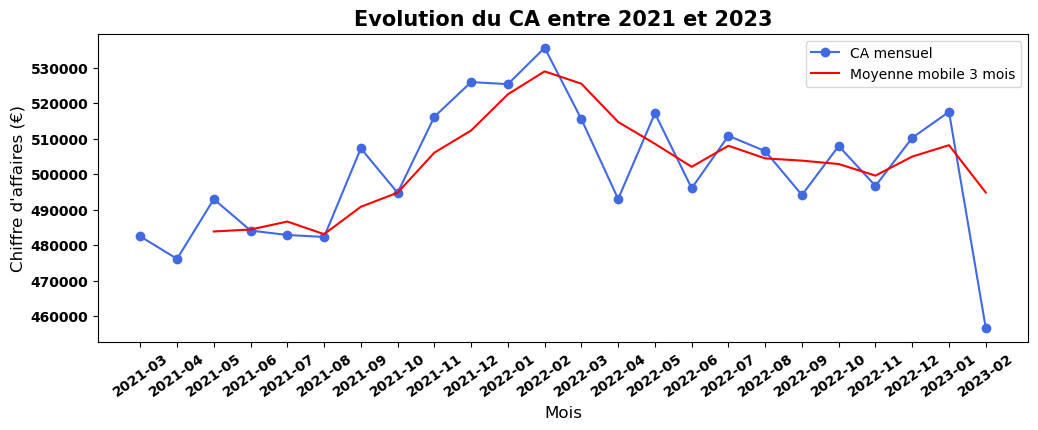

In [73]:
#Graphique représentant l'évolution du CA par mois entre 2021 et 2023

#largeur et hauteur
plt.figure(figsize=(12, 4))

#Définition de la courbe de CA mensuel
plt.plot(CA_mensuel['mois-année'], CA_mensuel['CA mensuel'], marker="o", linestyle='-', color='royalblue', label='CA mensuel')

#Orientation des noms d'abscisses à 35°
plt.xticks(rotation = 35)

#Définition de la courbe de moyenne mobile sur 3 mois
plt.plot(CA_mensuel['mois-année'], CA_mensuel['CA mensuel'].rolling(3).mean(), linestyle='-', color='red', label='Moyenne mobile 3 mois')

plt.title("Evolution du CA entre 2021 et 2023", fontsize=15,fontweight='bold')
plt.ylabel("Chiffre d'affaires (€)", fontsize=12)
plt.xlabel("Mois", fontsize=12, multialignment='center')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.legend()
plt.show()

Entre 02/2022 et 04/2022 inclus, on constate une forte baisse du CA mensuel. La moyenne mobile à 3 mois confirme cette tendance : de manière générale, le CA augmente progressivement jusqu'à 02/2022 puis la tendance est une baisse progressive de 02/2022 à 11/2022.

Nous allons effectuer un focus du CA chaque semaine sur cette période comprise entre 02/2022 et 04/2022 car le CA mensuel passe de 535K€ en 02/2022 à 490K€ en 04/2022.

In [75]:
#Création nouvelle colonne de "semaine"
df_transactions_products_customers['semaine']= df_transactions_products_customers['date'].dt.strftime('%Y-%W')

In [76]:
#Calcul du CA par semaine
CA_hebdo = df_transactions_products_customers.groupby(df_transactions_products_customers['semaine'])['price'].sum().reset_index(name='CA hebdo')
display(CA_hebdo.head())

semaine   CA hebdo
0  2021-09  110463.28
1  2021-10  105693.24
2  2021-11  112059.08
3  2021-12  109441.07
4  2021-13  107895.66

Création d'une courbe représentant le CA hebdo - Période de 02/2022 à 04/2022 inclus : 

In [78]:
#Affichage des transactions comprises sur le mois de 02/2022
df_transactions_products_customers.loc[df_transactions_products_customers['mois-année']=='2022-02']

#La période de 02/2022 correspond aux semaines 5 à 9

id_prod                       date session_id client_id  price  \
316014   1_547 2022-02-01 00:02:10.522397   s_158084    c_4563  15.99   
316015  0_1390 2022-02-01 00:04:06.323412   s_158086     c_892  19.37   
316016  0_1254 2022-02-01 00:04:52.633371   s_158083    c_7212   5.22   
316017   1_287 2022-02-01 00:04:55.646536   s_158091    c_4144  29.99   
316018  0_1282 2022-02-01 00:06:37.339413   s_158092    c_3454   5.67   
...        ...                        ...        ...       ...    ...   
345603   1_456 2022-02-28 23:56:57.196281   s_172422    c_5787  28.27   
345604   1_370 2022-02-28 23:56:57.561424   s_172423    c_1460  13.11   
345605  0_1538 2022-02-28 23:57:12.741573   s_172424    c_1876   8.61   
345606  0_1403 2022-02-28 23:59:02.381670   s_172423    c_1460  15.99   
345607  0_1775 2022-02-28 23:59:58.040472   s_172423    c_1460   6.99   

          categ sex  birth mois-année  semaine  
316014  Categ_1   f   1983    2022-02  2022-05  
316015  Categ_0   m   1977    2022-02  2022-05  
316016  Categ_0   f   1975    2022-02  2022-05  
316017  Categ_1   f   1998    2022-02  2022-05  
316018  Categ_0   m   1969    2022-02  2022-05  
...         ...  ..    ...        ...      ...  
345603  Categ_1   f   1986    2022-02  2022-09  
345604  Categ_1   m   1989    2022-02  2022-09  
345605  Categ_0   m   1983    2022-02  2022-09  
345606  Categ_0   m   1989    2022-02  2022-09  
345607  Categ_0   m   1989    2022-02  2022-09  

[29594 rows x 10 columns]

In [79]:
#Affichage des transactions comprises sur le mois de 03/2022
df_transactions_products_customers.loc[df_transactions_products_customers['mois-année']=='2022-03']

#La période de 02/2022 correspond aux semaines 10 à 13

id_prod                       date session_id client_id  price  \
345608   1_547 2022-03-01 00:02:10.522397   s_172434    c_4563  15.99   
345609  0_1390 2022-03-01 00:04:06.323412   s_172436     c_892  19.37   
345610  0_1254 2022-03-01 00:04:52.633371   s_172433    c_7212   5.22   
345611   1_287 2022-03-01 00:04:55.646536   s_172441    c_4144  29.99   
345612  0_1282 2022-03-01 00:06:37.339413   s_172442    c_3454   5.67   
...        ...                        ...        ...       ...    ...   
375299   0_571 2022-03-31 23:55:19.972524   s_187478    c_1609  17.99   
375300   1_364 2022-03-31 23:55:37.450822   s_187494    c_5591  10.30   
375301   2_186 2022-03-31 23:55:37.506320   s_187496    c_6731  84.96   
375302    0_33 2022-03-31 23:56:28.108950   s_187497     c_642  18.99   
375303   1_461 2022-03-31 23:59:54.413783   s_187486     c_309  12.99   

          categ sex  birth mois-année  semaine  
345608  Categ_1   f   1983    2022-03  2022-09  
345609  Categ_0   m   1977    2022-03  2022-09  
345610  Categ_0   f   1975    2022-03  2022-09  
345611  Categ_1   f   1998    2022-03  2022-09  
345612  Categ_0   m   1969    2022-03  2022-09  
...         ...  ..    ...        ...      ...  
375299  Categ_0   m   1980    2022-03  2022-13  
375300  Categ_1   f   1962    2022-03  2022-13  
375301  Categ_2   f   2001    2022-03  2022-13  
375302  Categ_0   m   1968    2022-03  2022-13  
375303  Categ_1   f   1957    2022-03  2022-13  

[29696 rows x 10 columns]

In [80]:
#Affichage des transactions comprises sur le mois de 04/2022
df_transactions_products_customers.loc[df_transactions_products_customers['mois-année']=='2022-04']

#La période de 02/2022 correspond aux semaines 14 à 17

id_prod                       date session_id client_id  price  \
375304  0_1532 2022-04-01 00:00:00.433085   s_187498    c_8517  17.14   
375305   1_376 2022-04-01 00:02:17.335837   s_187498    c_8517  17.49   
375306  0_1188 2022-04-01 00:05:57.726826   s_187500    c_5858  14.94   
375307  0_1404 2022-04-01 00:06:06.724189   s_187503    c_6005   6.84   
375308  0_1430 2022-04-01 00:11:24.725428   s_187507    c_8174  16.47   
...        ...                        ...        ...       ...    ...   
402901   1_352 2022-04-30 23:54:46.910157   s_201815    c_1341  19.57   
402902   1_426 2022-04-30 23:55:37.253291   s_201814    c_8280  19.44   
402903  0_1560 2022-04-30 23:56:02.090449   s_201803    c_4046  12.12   
402904  0_1136 2022-04-30 23:57:27.506277   s_201816    c_5206   3.02   
402905  0_1366 2022-04-30 23:57:35.819102   s_201816    c_5206  16.65   

          categ sex  birth mois-année  semaine  
375304  Categ_0   f   2000    2022-04  2022-13  
375305  Categ_1   f   2000    2022-04  2022-13  
375306  Categ_0   m   1984    2022-04  2022-13  
375307  Categ_0   m   1988    2022-04  2022-13  
375308  Categ_0   m   1991    2022-04  2022-13  
...         ...  ..    ...        ...      ...  
402901  Categ_1   f   1971    2022-04  2022-17  
402902  Categ_1   f   1967    2022-04  2022-17  
402903  Categ_0   m   1975    2022-04  2022-17  
402904  Categ_0   m   1982    2022-04  2022-17  
402905  Categ_0   m   1982    2022-04  2022-17  

[27602 rows x 10 columns]

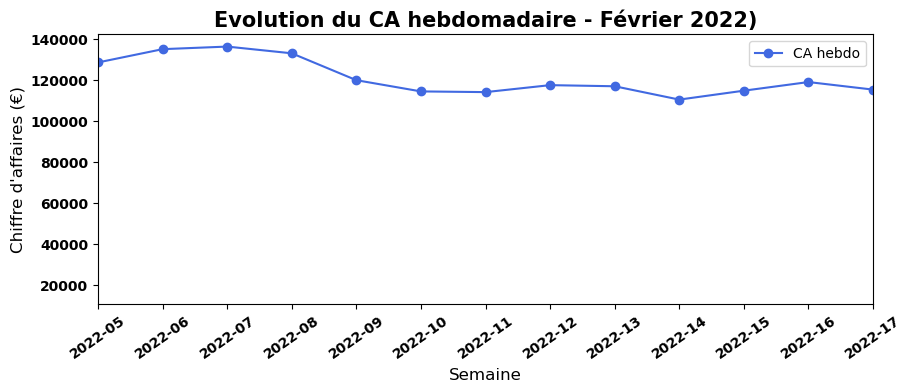

In [81]:
#Graphique représentant l'évolution du CA hebdomadaire sur la période comprise entre 02/2022 et 06/2022

#largeur et hauteur
plt.figure(figsize=(10, 3.5))

#Courbe de CA mensuel
plt.plot(CA_hebdo['semaine'], CA_hebdo['CA hebdo'], marker="o", linestyle='-', color='royalblue', label='CA hebdo')

#Orientation des noms d'abscisses à 35°
plt.xticks(rotation = 35)

#Définition d'une borne sur les semaines à afficher (semaines 5 à 17)
plt.xlim('2022-05', '2022-17')

plt.title("Evolution du CA hebdomadaire - Février 2022)", fontsize=15,fontweight='bold')
plt.ylabel("Chiffre d'affaires (€)", fontsize=12)
plt.xlabel("Semaine", fontsize=12, multialignment='center')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.legend()
plt.show()

On constate que le CA hebdomadaire diminue sensiblement à partir de la semaine N°9 pour rester stable jusqu'à la semaine N°17.

Semaine N°5 à semaine N°8 (mois de 02/2022) : 130-135K€/semaine

Semaine N°9 à semaine N°17 (mois de 02+03/2022) : 115-120K€/semaine avec un minimum à 110K€ en semaine N°14

On peut également faire un focus journalier sur la même période pour essayer de comprendre cette baisse :

In [84]:
#Création nouvelle colonne de "jour"
df_transactions_products_customers['jour']= df_transactions_products_customers['date'].dt.strftime('%Y-%m-%d')

In [85]:
#Calcul du CA par jour
CA_jour = df_transactions_products_customers.groupby(df_transactions_products_customers['jour'])['price'].sum().reset_index(name='CA journalier')
display(CA_jour.head())

jour  CA journalier
0  2021-03-01       16565.22
1  2021-03-02       15486.45
2  2021-03-03       15198.69
3  2021-03-04       15196.07
4  2021-03-05       17471.37

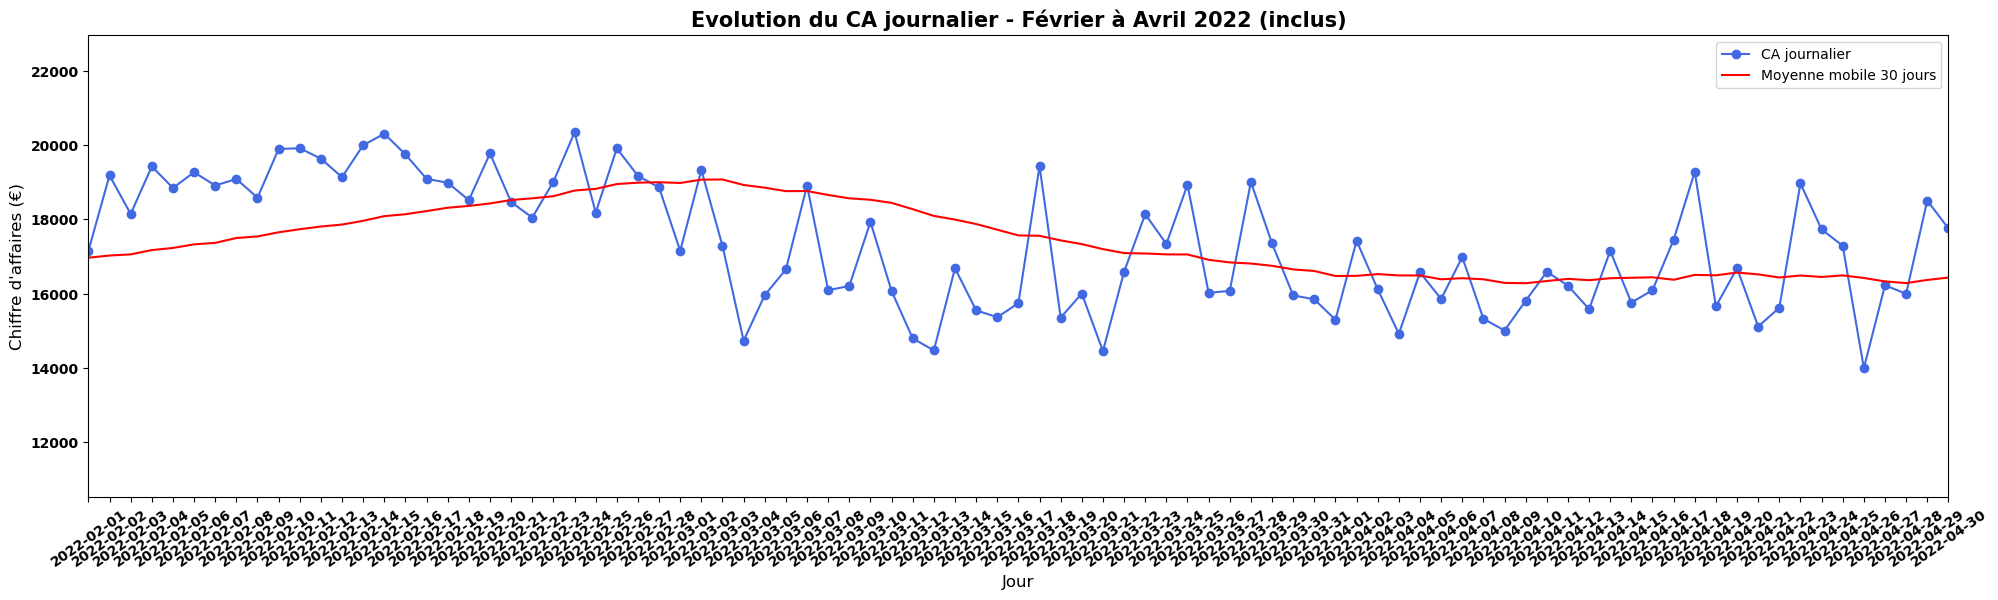

In [86]:
#Graphique représentant l'évolution du CA journalier sur la période comprise entre 02/2022 et 06/2022

#largeur et hauteur
plt.figure(figsize=(24, 6))

#Courbe de CA mensuel
plt.plot(CA_jour['jour'], CA_jour['CA journalier'], marker="o", linestyle='-', color='royalblue', label='CA journalier')

#Orientation des noms d'abscisses à 35°
plt.xticks(rotation = 35)

#Définition d'une borne sur les jours à afficher (01-02-2022 au 30-04-2022)
plt.xlim('2022-02-01', '2022-04-30')

#Courbe de moyenne mobile sur 30 jours
plt.plot(CA_jour['jour'], CA_jour['CA journalier'].rolling(30).mean(), linestyle='-', color='red', label='Moyenne mobile 30 jours')

plt.title("Evolution du CA journalier - Février à Avril 2022 (inclus)", fontsize=15,fontweight='bold')
plt.ylabel("Chiffre d'affaires (€)", fontsize=12)
plt.xlabel("Jour", fontsize=12, multialignment='center')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.legend()
plt.show()

On constate 5 jours en particulier pour lesquels il y a une baisse de CA plus importante : 

  - Entre le 06/03 et 07/03
  - Entre le 17/03 et 18/03
  - Entre le 24/03 et 25/03
  - Entre le 17/04 et 18/04
  - Entre le 24/04 et 25/04

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Chiffre d’affaires par catégorie</h3>
</div>

In [89]:
#Calcul du CA mensuel par catégorie par mois
CA_mensuel_categ = df_transactions_products_customers.groupby([df_transactions_products_customers['mois-année'],df_transactions_products_customers['categ']])['price'].sum().reset_index(name='CA mensuel/categorie')
display(CA_mensuel_categ.head())

mois-année    categ  CA mensuel/categorie
0    2021-03  Categ_0             193629.17
1    2021-03  Categ_1             186974.17
2    2021-03  Categ_2             101837.27
3    2021-04  Categ_0             205222.46
4    2021-04  Categ_1             156138.35

In [90]:
#Vérification de la somme des CA/mois/categorie (doit être égal = 12 027 663€)
CA_mensuel_categ['CA mensuel/categorie'].sum()

12027663.1

In [91]:
#Affichage du CA mensuel - Catégorie 0
CA_mensuel_categ_0 = CA_mensuel_categ.loc[CA_mensuel_categ['categ']=='Categ_0', ['mois-année','CA mensuel/categorie']]
display(CA_mensuel_categ_0.head())

mois-année  CA mensuel/categorie
0     2021-03             193629.17
3     2021-04             205222.46
6     2021-05             196186.72
9     2021-06             167943.15
12    2021-07             144750.79

In [92]:
#Affichage du CA mensuel - Catégorie 1
CA_mensuel_categ_1 = CA_mensuel_categ.loc[CA_mensuel_categ['categ']=='Categ_1', ['mois-année','CA mensuel/categorie']]
display(CA_mensuel_categ_1.head())

mois-année  CA mensuel/categorie
1     2021-03             186974.17
4     2021-04             156138.35
7     2021-05             165893.40
10    2021-06             189162.04
13    2021-07             188523.27

In [93]:
#Affichage du CA mensuel - Catégorie 2
CA_mensuel_categ_2 = CA_mensuel_categ.loc[CA_mensuel_categ['categ']=='Categ_2', ['mois-année','CA mensuel/categorie']]
display(CA_mensuel_categ_2.head())

mois-année  CA mensuel/categorie
2     2021-03             101837.27
5     2021-04             114748.49
8     2021-05             130863.35
11    2021-06             126983.37
14    2021-07             149561.34

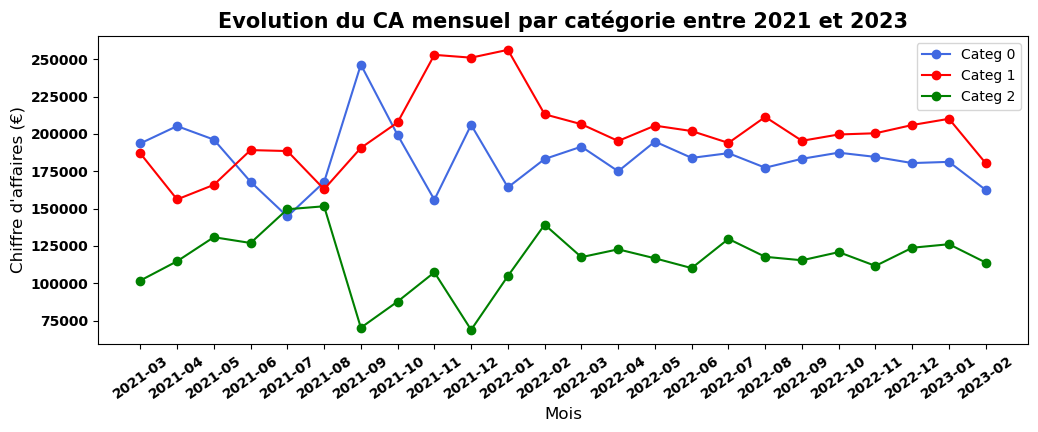

In [94]:
#Graphique représentant l'évolution du CA par mois entre 2021 et 2023 - Par Catégorie

#largeur et hauteur
plt.figure(figsize=(12, 4))

#Courbe de CA mensuel - Catégorie 0
plt.plot(CA_mensuel_categ_0['mois-année'], CA_mensuel_categ_0['CA mensuel/categorie'], marker="o", linestyle='-', color='royalblue', label='Categ 0')

#Courbe de CA mensuel - Catégorie 1
plt.plot(CA_mensuel_categ_1['mois-année'], CA_mensuel_categ_1['CA mensuel/categorie'], marker="o", linestyle='-', color='red', label='Categ 1')

#Définition de la courbe de CA mensuel - Catégorie 2
plt.plot(CA_mensuel_categ_2['mois-année'], CA_mensuel_categ_2['CA mensuel/categorie'], marker="o", linestyle='-', color='green', label='Categ 2')

#Orientation des noms d'abscisses à 35°
plt.xticks(rotation = 35)

plt.title("Evolution du CA mensuel par catégorie entre 2021 et 2023", fontsize=15,fontweight='bold')
plt.ylabel("Chiffre d'affaires (€)", fontsize=12)
plt.xlabel("Mois", fontsize=12, multialignment='center')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.legend()
plt.show()

Focus sur l'évolution du CA journalier sur les périodes spécifiques suivantes : 
- Entre 06/2021 et 08/2021 : pour comprendre la répartition "classique"
- Entre 09/2021 et 11/2021 : car période de forte baisse de CA sur catégories 0 et 2 vs forte hausse sur la catégorie 1
- Entre 12/2021 et 02/2022 : car période de forte baisse sur catégorie 2 vs forte baisse pour catégories 0 et 2

In [96]:
#Calcul du CA journalier par catégorie
CA_journalier_categ = df_transactions_products_customers.groupby([df_transactions_products_customers['jour'],df_transactions_products_customers['categ']])['price'].sum().reset_index(name='CA journalier/categorie')
display(CA_journalier_categ.head())

jour    categ  CA journalier/categorie
0  2021-03-01  Categ_0                  6262.65
1  2021-03-01  Categ_1                  6811.53
2  2021-03-01  Categ_2                  3491.04
3  2021-03-02  Categ_0                  6718.27
4  2021-03-02  Categ_1                  5627.15

In [97]:
#Affichage CA journalier - Catégorie 0
CA_journalier_categ_0 = CA_journalier_categ.loc[CA_journalier_categ['categ']=='Categ_0', ['jour','CA journalier/categorie']]
display(CA_journalier_categ_0.head())

jour  CA journalier/categorie
0   2021-03-01                  6262.65
3   2021-03-02                  6718.27
6   2021-03-03                  6121.03
9   2021-03-04                  5891.48
12  2021-03-05                  5975.97

In [98]:
#Affichage CA journalier - Catégorie 1
CA_journalier_categ_1 = CA_journalier_categ.loc[CA_journalier_categ['categ']=='Categ_1', ['jour','CA journalier/categorie']]
display(CA_journalier_categ_1.head())

jour  CA journalier/categorie
1   2021-03-01                  6811.53
4   2021-03-02                  5627.15
7   2021-03-03                  5691.41
10  2021-03-04                  6098.98
13  2021-03-05                  7071.21

In [99]:
#Affichage CA journalier - Catégorie 2
CA_journalier_categ_2 = CA_journalier_categ.loc[CA_journalier_categ['categ']=='Categ_2', ['jour','CA journalier/categorie']]
display(CA_journalier_categ_2.head())

jour  CA journalier/categorie
2   2021-03-01                  3491.04
5   2021-03-02                  3141.03
8   2021-03-03                  3386.25
11  2021-03-04                  3205.61
14  2021-03-05                  4424.19

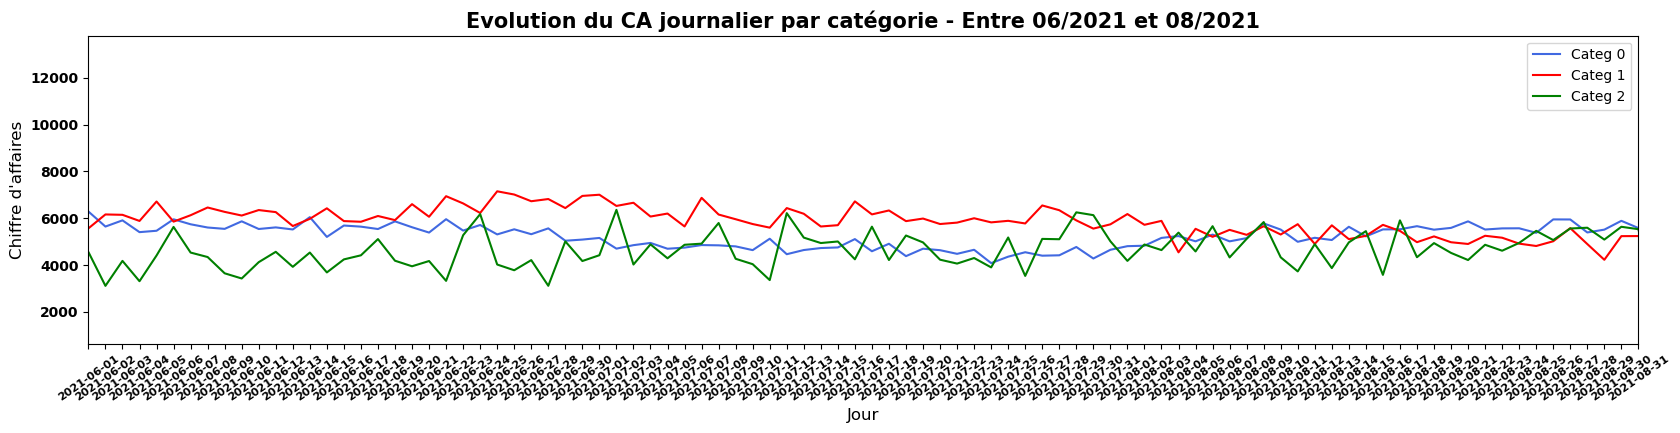

In [100]:
#Graphique représentant du CA journalier par catégorie - Entre 06/2021 et 08/2021

#largeur et hauteur
plt.figure(figsize=(20, 4))

#Courbe du nombre de transactions journalières - Catégorie 0
plt.plot(CA_journalier_categ_0['jour'], CA_journalier_categ_0['CA journalier/categorie'], linestyle='-', color='royalblue', label='Categ 0')

#Courbe nombre de transactions journalières - Catégorie 1
plt.plot(CA_journalier_categ_1['jour'], CA_journalier_categ_1['CA journalier/categorie'], linestyle='-', color='red', label='Categ 1')

#Définition nombre de transactions journalières - Catégorie 2
plt.plot(CA_journalier_categ_2['jour'], CA_journalier_categ_2['CA journalier/categorie'], linestyle='-', color='green', label='Categ 2')

#Définition d'une borne sur la période à afficher
plt.xlim('2021-06-01', '2021-08-31')

#Orientation des noms d'abscisses à 35°
plt.xticks(rotation = 35)

plt.title("Evolution du CA journalier par catégorie - Entre 06/2021 et 08/2021", fontsize=15,fontweight='bold')
plt.ylabel("Chiffre d'affaires", fontsize=12)
plt.xlabel("Jour", fontsize=12, multialignment='center')
plt.xticks(fontsize=8, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.legend()
plt.show()

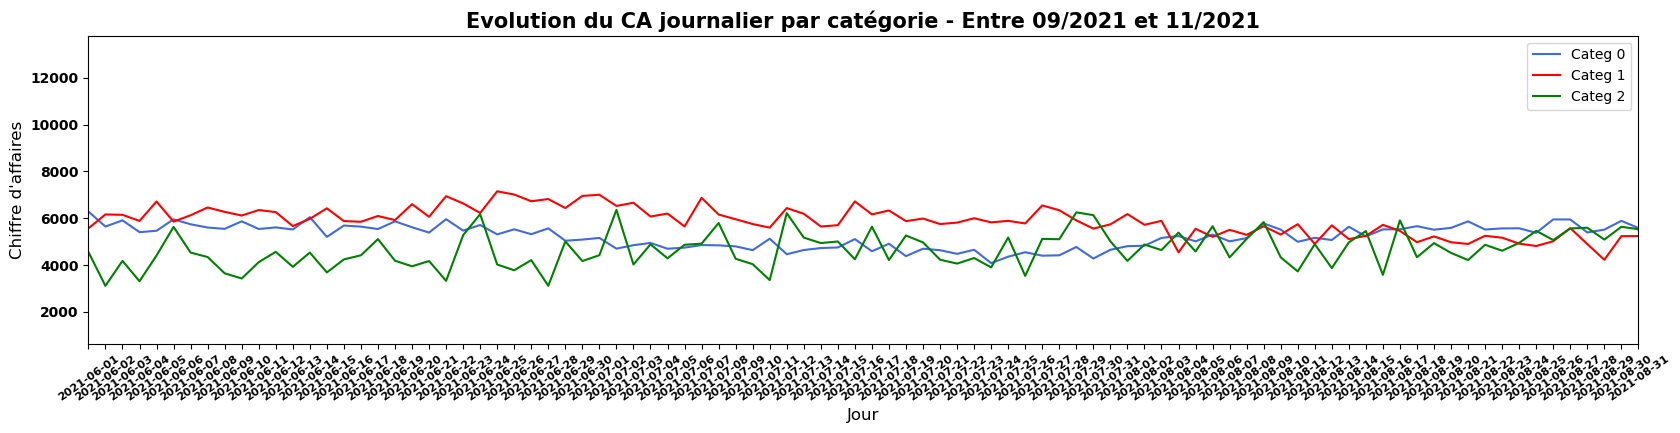

In [101]:
#Graphique représentant du CA journalier par catégorie - Entre 09/2021 et 11/2021

#largeur et hauteur
plt.figure(figsize=(20, 4))

#Courbe du nombre de transactions journalières - Catégorie 0
plt.plot(CA_journalier_categ_0['jour'], CA_journalier_categ_0['CA journalier/categorie'], linestyle='-', color='royalblue', label='Categ 0')

#Courbe nombre de transactions journalières - Catégorie 1
plt.plot(CA_journalier_categ_1['jour'], CA_journalier_categ_1['CA journalier/categorie'], linestyle='-', color='red', label='Categ 1')

#Définition nombre de transactions journalières - Catégorie 2
plt.plot(CA_journalier_categ_2['jour'], CA_journalier_categ_2['CA journalier/categorie'], linestyle='-', color='green', label='Categ 2')

#Définition d'une borne sur la période à afficher
plt.xlim('2021-06-01', '2021-08-31')

#Orientation des noms d'abscisses à 35°
plt.xticks(rotation = 35)

plt.title("Evolution du CA journalier par catégorie - Entre 09/2021 et 11/2021", fontsize=15,fontweight='bold')
plt.ylabel("Chiffre d'affaires", fontsize=12)
plt.xlabel("Jour", fontsize=12, multialignment='center')
plt.xticks(fontsize=8, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.legend()
plt.show()

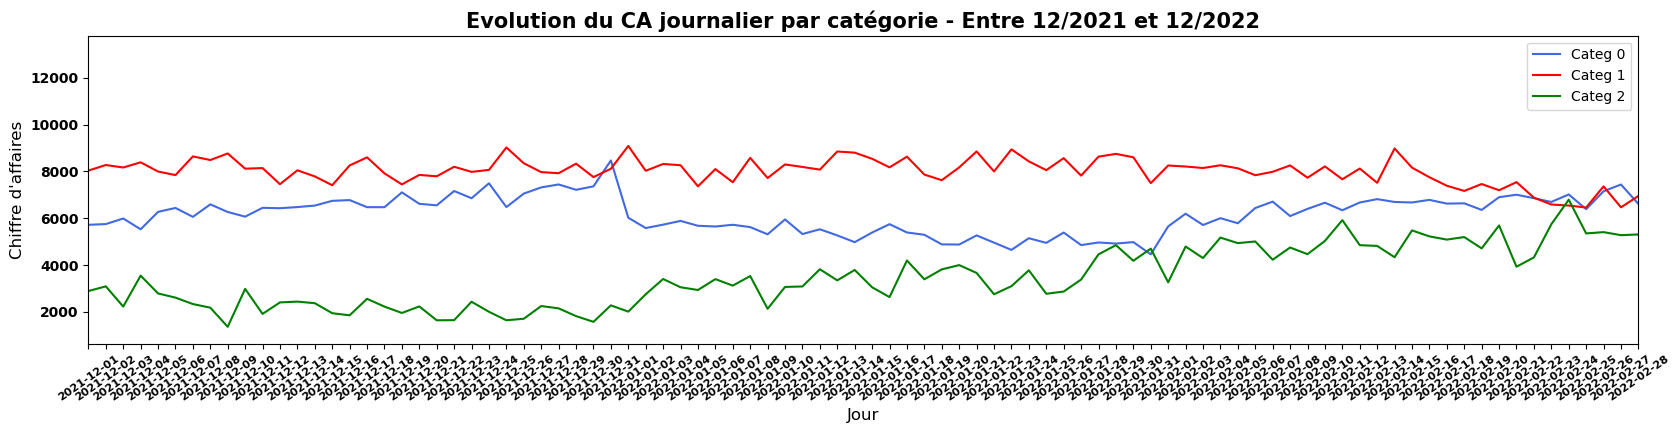

In [102]:
#Graphique représentant du CA journalier par catégorie - Entre 12/2021 et 12/2022

#largeur et hauteur
plt.figure(figsize=(20, 4))

#Courbe du nombre de transactions journalières - Catégorie 0
plt.plot(CA_journalier_categ_0['jour'], CA_journalier_categ_0['CA journalier/categorie'], linestyle='-', color='royalblue', label='Categ 0')

#Courbe nombre de transactions journalières - Catégorie 1
plt.plot(CA_journalier_categ_1['jour'], CA_journalier_categ_1['CA journalier/categorie'], linestyle='-', color='red', label='Categ 1')

#Définition nombre de transactions journalières - Catégorie 2
plt.plot(CA_journalier_categ_2['jour'], CA_journalier_categ_2['CA journalier/categorie'], linestyle='-', color='green', label='Categ 2')

#Définition d'une borne sur la période à afficher
plt.xlim('2021-12-01', '2022-02-28')

#Orientation des noms d'abscisses à 35°
plt.xticks(rotation = 35)

plt.title("Evolution du CA journalier par catégorie - Entre 12/2021 et 12/2022", fontsize=15,fontweight='bold')
plt.ylabel("Chiffre d'affaires", fontsize=12)
plt.xlabel("Jour", fontsize=12, multialignment='center')
plt.xticks(fontsize=8, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.legend()
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.3 - Nombre de clients par mois</h3>
</div>

In [104]:
print("Nombre de clients ayant effectué une transaction :",df_transactions_products_customers['client_id'].nunique())
print("Nombre de clients dans la base de données de clients :",df_customers['client_id'].nunique())

Nombre de clients ayant effectué une transaction : 8600
Nombre de clients dans la base de données de clients : 8621


In [105]:
#Liste de nombre de clients unique par mois
nombre_clients_mensuel_series = df_transactions_products_customers.groupby('mois-année')['client_id'].nunique()
nombre_clients_mensuel_series.head()

mois-année
2021-03    5676
2021-04    5674
2021-05    5644
2021-06    5659
2021-07    5672
Name: client_id, dtype: int64

In [106]:
#Conversion de la series en dataframe
nombre_clients_mensuel = nombre_clients_mensuel_series.to_frame().reset_index()
display(nombre_clients_mensuel.head())

mois-année  client_id
0    2021-03       5676
1    2021-04       5674
2    2021-05       5644
3    2021-06       5659
4    2021-07       5672

In [107]:
#Renommer la colonne "client_id" en "Nombre clients uniques"
nombre_clients_mensuel = nombre_clients_mensuel.rename(columns={'client_id': 'Nombre clients uniques'})

In [108]:
#Affichage dataframe "nombre_clients_mensuel"
display(nombre_clients_mensuel.head())

mois-année  Nombre clients uniques
0    2021-03                    5676
1    2021-04                    5674
2    2021-05                    5644
3    2021-06                    5659
4    2021-07                    5672

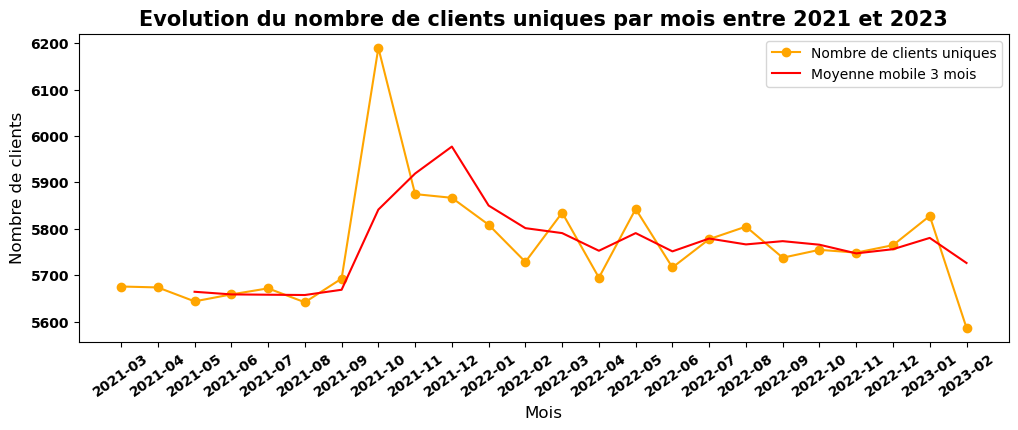

In [109]:
#Graphique représentant l'évolution du nombre de clients uniques par mois

#largeur et hauteur
plt.figure(figsize=(12, 4))

#Courbe représentant le nombre de clients uniques par mois
plt.plot(nombre_clients_mensuel['mois-année'], nombre_clients_mensuel['Nombre clients uniques'], marker="o", linestyle='-', color='orange', label='Nombre de clients uniques')

#Orientation des noms d'abscisses à 35°
plt.xticks(rotation = 35)

#Calcul de la moyenne mobile à 3 mois
plt.plot(nombre_clients_mensuel['mois-année'], nombre_clients_mensuel['Nombre clients uniques'].rolling(3).mean(), linestyle='-', color='red', label='Moyenne mobile 3 mois')

plt.title("Evolution du nombre de clients uniques par mois entre 2021 et 2023", fontsize=15,fontweight='bold')
plt.ylabel("Nombre de clients", fontsize=12)
plt.xlabel("Mois", fontsize=12, multialignment='center')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.legend()
plt.show()

Nous observons un pic principal de clients en 10/2021 (6200 clients vs 5700 le mois précédent et vs 5900 le mois d'après) :

Entre 09/2021 et 10/2021 : (6200-5700)/5700 = +8.77%

Entre 10/2021 et 11/2021 : (6200-5900)/5900 = -5.08%

On observe aussi une forte baisse de nombre de clients uniques entre 01/2023 et 02/2023 : (5850-5600)/5600 = -4.46%

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.4 - Nombre de transactions</h3>
</div>

In [112]:
print("Nombre total de transactions :",df_transactions_products_customers['session_id'].nunique())

Nombre total de transactions : 345505


In [113]:
#Liste du nombre de transactions par mois
nombre_transactions_mensuel_series = df_transactions_products_customers.groupby('mois-année')['session_id'].nunique()
display(nombre_transactions_mensuel_series.head())

mois-année
2021-03    14201
2021-04    13970
2021-05    14168
2021-06    13838
2021-07    13571
Name: session_id, dtype: int64

In [114]:
#Conversion de la series en dataframe
nombre_transactions_mensuel = nombre_transactions_mensuel_series.to_frame().reset_index()
display(nombre_transactions_mensuel.head())

mois-année  session_id
0    2021-03       14201
1    2021-04       13970
2    2021-05       14168
3    2021-06       13838
4    2021-07       13571

In [115]:
#Renommer la colonne "session_id" en "Nombre transactions"
nombre_transactions_mensuel = nombre_transactions_mensuel.rename(columns={'session_id': 'Nombre transactions'})

In [116]:
#Affichage dataframe "nombre_transactions_mensuel"
display(nombre_transactions_mensuel.head())

mois-année  Nombre transactions
0    2021-03                14201
1    2021-04                13970
2    2021-05                14168
3    2021-06                13838
4    2021-07                13571

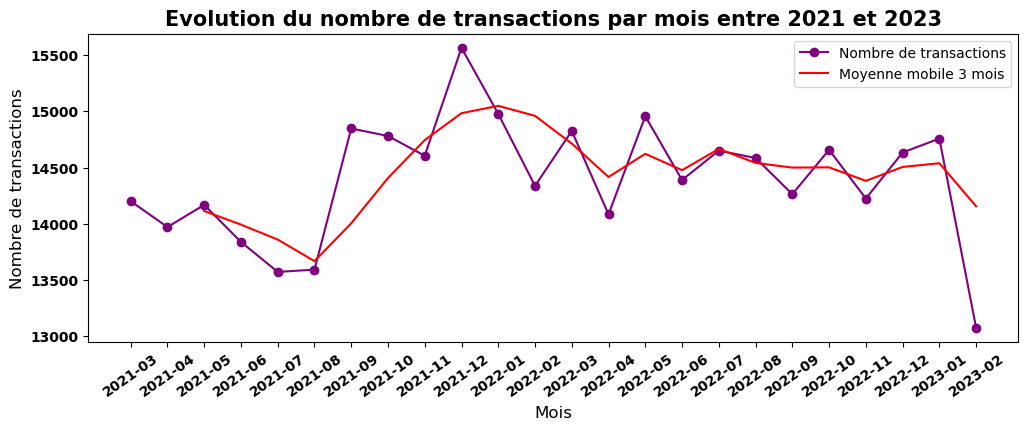

In [117]:
#Graphique représentant l'évolution du nombre de transactions par mois

#largeur et hauteur
plt.figure(figsize=(12, 4))

#Courbe représentant le nombre de transactions par mois
plt.plot(nombre_transactions_mensuel['mois-année'], nombre_transactions_mensuel['Nombre transactions'], marker="o", linestyle='-', color='purple', label='Nombre de transactions')

#Orientation des noms d'abscisses à 35°
plt.xticks(rotation = 35)

#Calcul de la moyenne mobile à 3 mois
plt.plot(nombre_transactions_mensuel['mois-année'], nombre_transactions_mensuel['Nombre transactions'].rolling(3).mean(), linestyle='-', color='red', label='Moyenne mobile 3 mois')

plt.title("Evolution du nombre de transactions par mois entre 2021 et 2023", fontsize=15,fontweight='bold')
plt.ylabel("Nombre de transactions", fontsize=12)
plt.xlabel("Mois", fontsize=12, multialignment='center')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.legend()
plt.show()

Nous observons 3 pics d'augmentation du nombre de transactions mensuelles :

=> Entre 08/2021 et 09/2021 : +9.25%

=> Entre 11/2021 et 12/2021 : +6.58 %

=> Entre 04/2022 et 05/2022 : +6.2%

In [119]:
transac_2021_08 = nombre_transactions_mensuel.loc[nombre_transactions_mensuel['mois-année']=='2021-08','Nombre transactions'].item()
transac_2021_09 = nombre_transactions_mensuel.loc[nombre_transactions_mensuel['mois-année']=='2021-09','Nombre transactions'].item()
print("Entre 08/2021 et 09/2021 :", "+",round((transac_2021_09-transac_2021_08)/transac_2021_08*100,2),"%")

Entre 08/2021 et 09/2021 : + 9.25 %


In [120]:
transac_2021_11 = nombre_transactions_mensuel.loc[nombre_transactions_mensuel['mois-année']=='2021-11','Nombre transactions'].item()
transac_2021_12 = nombre_transactions_mensuel.loc[nombre_transactions_mensuel['mois-année']=='2021-12','Nombre transactions'].item()
print("Entre 11/2021 et 12/2021 :", "+",round((transac_2021_12-transac_2021_11)/transac_2021_11*100,2),"%")

Entre 11/2021 et 12/2021 : + 6.58 %


In [121]:
transac_2022_04 = nombre_transactions_mensuel.loc[nombre_transactions_mensuel['mois-année']=='2022-04','Nombre transactions'].item()
transac_2022_05 = nombre_transactions_mensuel.loc[nombre_transactions_mensuel['mois-année']=='2022-05','Nombre transactions'].item()
print("Entre 04/2022 et 05/2022 :", "+",round((transac_2022_05-transac_2022_04)/transac_2022_04*100,2),"%")

Entre 04/2022 et 05/2022 : + 6.2 %


On observe également 5 grosses baisses du nombre de transactions mensuelles :

=> Entre 05/2021 et 07/2021 : -9.27 %

=> Entre 12/2021 et 02/2022 : -7.9 %

=> Entre 03/2022 et 04/2022 : -5.0 %

=> Entre 05/2022 et 06/2022 : -3.8 %

=> Entre 01/2023 et 02/2023 : -11.42 %

In [123]:
transac_2021_05 = nombre_transactions_mensuel.loc[nombre_transactions_mensuel['mois-année']=='2021-05','Nombre transactions'].item()
transac_2022_07 = nombre_transactions_mensuel.loc[nombre_transactions_mensuel['mois-année']=='2021-07','Nombre transactions'].item()
print("Entre 05/2021 et 07/2021 :", round((transac_2022_07-transac_2022_05)/transac_2022_05*100,2),"%")

Entre 05/2021 et 07/2021 : -9.27 %


In [124]:
transac_2021_12 = nombre_transactions_mensuel.loc[nombre_transactions_mensuel['mois-année']=='2021-12','Nombre transactions'].item()
transac_2022_02 = nombre_transactions_mensuel.loc[nombre_transactions_mensuel['mois-année']=='2022-02','Nombre transactions'].item()
print("Entre 12/2021 et 02/2022 :", round((transac_2022_02-transac_2021_12)/transac_2021_12*100,2),"%")

Entre 12/2021 et 02/2022 : -7.9 %


In [125]:
transac_2022_03 = nombre_transactions_mensuel.loc[nombre_transactions_mensuel['mois-année']=='2022-03','Nombre transactions'].item()
transac_2022_04 = nombre_transactions_mensuel.loc[nombre_transactions_mensuel['mois-année']=='2022-04','Nombre transactions'].item()
print("Entre 03/2022 et 04/2022 :", round((transac_2022_04-transac_2022_03)/transac_2022_03*100,2),"%")

Entre 03/2022 et 04/2022 : -5.0 %


In [126]:
transac_2022_05 = nombre_transactions_mensuel.loc[nombre_transactions_mensuel['mois-année']=='2022-05','Nombre transactions'].item()
transac_2022_06 = nombre_transactions_mensuel.loc[nombre_transactions_mensuel['mois-année']=='2022-06','Nombre transactions'].item()
print("Entre 05/2022 et 06/2022 :", round((transac_2022_06-transac_2022_05)/transac_2022_05*100,2),"%")

Entre 05/2022 et 06/2022 : -3.8 %


In [127]:
transac_2023_01 = nombre_transactions_mensuel.loc[nombre_transactions_mensuel['mois-année']=='2023-01','Nombre transactions'].item()
transac_2023_02 = nombre_transactions_mensuel.loc[nombre_transactions_mensuel['mois-année']=='2023-02','Nombre transactions'].item()
print("Entre 01/2023 et 02/2023 :", round((transac_2023_02-transac_2023_01)/transac_2023_01*100,2),"%")

Entre 01/2023 et 02/2023 : -11.42 %


Zoom sur le nombre de transactions par catégorie par jour sur les périodes spécifiques suivantes :
- D'abord sur la période comprise entre 06/2021 et 08/2021 : pour comprendre la répartition "normale" par catégorie
- Entre 09/2021 et 02/2022 : car c'est une période avec beaucoup de variations
- Entre 12/2022 et 02/2023 : forte baisse du nombre global de transactions

In [129]:
#Calcul du nombre de transactions par catégorie par jour
nb_transac_par_categorie = df_transactions_products_customers.groupby([df_transactions_products_customers['jour'],df_transactions_products_customers['categ']])['id_prod'].count().reset_index(name='Nombre')
display(nb_transac_par_categorie.head())

jour    categ  Nombre
0  2021-03-01  Categ_0     581
1  2021-03-01  Categ_1     335
2  2021-03-01  Categ_2      46
3  2021-03-02  Categ_0     620
4  2021-03-02  Categ_1     276

In [130]:
#Affichage nombre de transactions par jour - Catégorie 0
nb_transac_categ_0 = nb_transac_par_categorie.loc[nb_transac_par_categorie['categ']=='Categ_0', ['jour','Nombre']]
display(nb_transac_categ_0.head())

jour  Nombre
0   2021-03-01     581
3   2021-03-02     620
6   2021-03-03     591
9   2021-03-04     563
12  2021-03-05     561

In [131]:
#Affichage nombre de transactions par jour - Catégorie 1
nb_transac_categ_1 = nb_transac_par_categorie.loc[nb_transac_par_categorie['categ']=='Categ_1', ['jour','Nombre']]
display(nb_transac_categ_1.head())

jour  Nombre
1   2021-03-01     335
4   2021-03-02     276
7   2021-03-03     280
10  2021-03-04     297
13  2021-03-05     331

In [132]:
#Affichage nombre de transactions par jour - Catégorie 2
nb_transac_categ_2 = nb_transac_par_categorie.loc[nb_transac_par_categorie['categ']=='Categ_2', ['jour','Nombre']]
display(nb_transac_categ_2.head())

jour  Nombre
2   2021-03-01      46
5   2021-03-02      43
8   2021-03-03      40
11  2021-03-04      43
14  2021-03-05      51

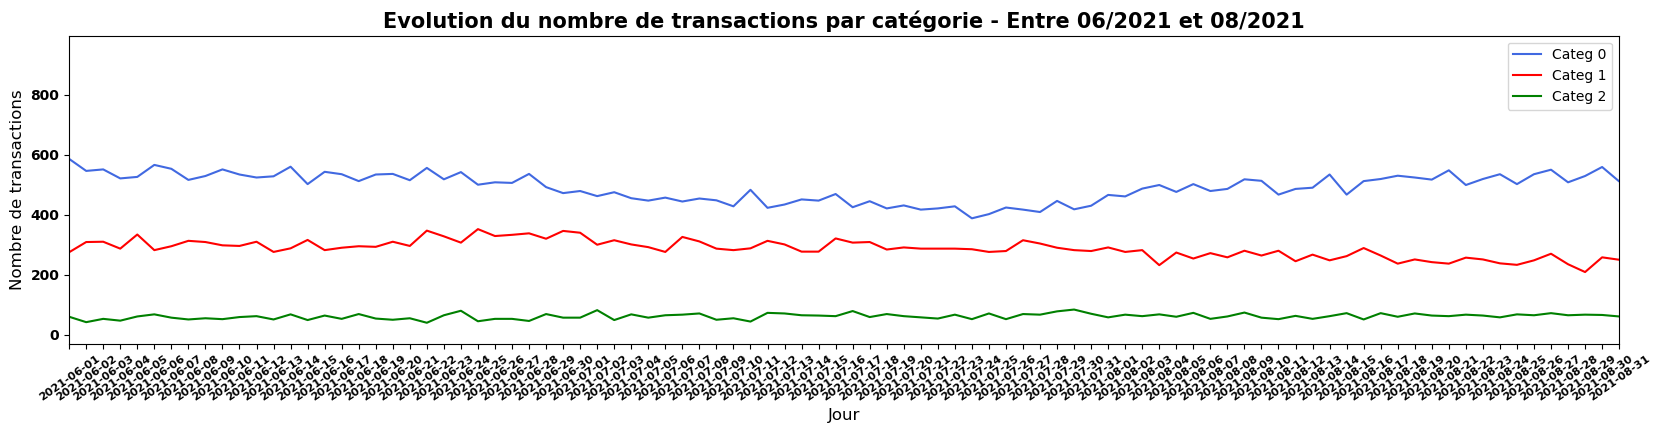

In [133]:
#Graphique représentant l'évolution du nombre de transactions par catégorie - Entre 06/2021 et 08/2021

#largeur et hauteur
plt.figure(figsize=(20, 4))

#Courbe du nombre de transactions journalières - Catégorie 0
plt.plot(nb_transac_categ_0['jour'], nb_transac_categ_0['Nombre'], linestyle='-', color='royalblue', label='Categ 0')

#Courbe nombre de transactions journalières - Catégorie 1
plt.plot(nb_transac_categ_1['jour'], nb_transac_categ_1['Nombre'], linestyle='-', color='red', label='Categ 1')

#Définition nombre de transactions journalières - Catégorie 2
plt.plot(nb_transac_categ_2['jour'], nb_transac_categ_2['Nombre'], linestyle='-', color='green', label='Categ 2')

#Définition d'une borne sur la période à afficher
plt.xlim('2021-06-01', '2021-08-31')

#Orientation des noms d'abscisses à 35°
plt.xticks(rotation = 35)

plt.title("Evolution du nombre de transactions par catégorie - Entre 06/2021 et 08/2021", fontsize=15,fontweight='bold')
plt.ylabel("Nombre de transactions", fontsize=12)
plt.xlabel("Jour", fontsize=12, multialignment='center')
plt.xticks(fontsize=8, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.legend()
plt.show()

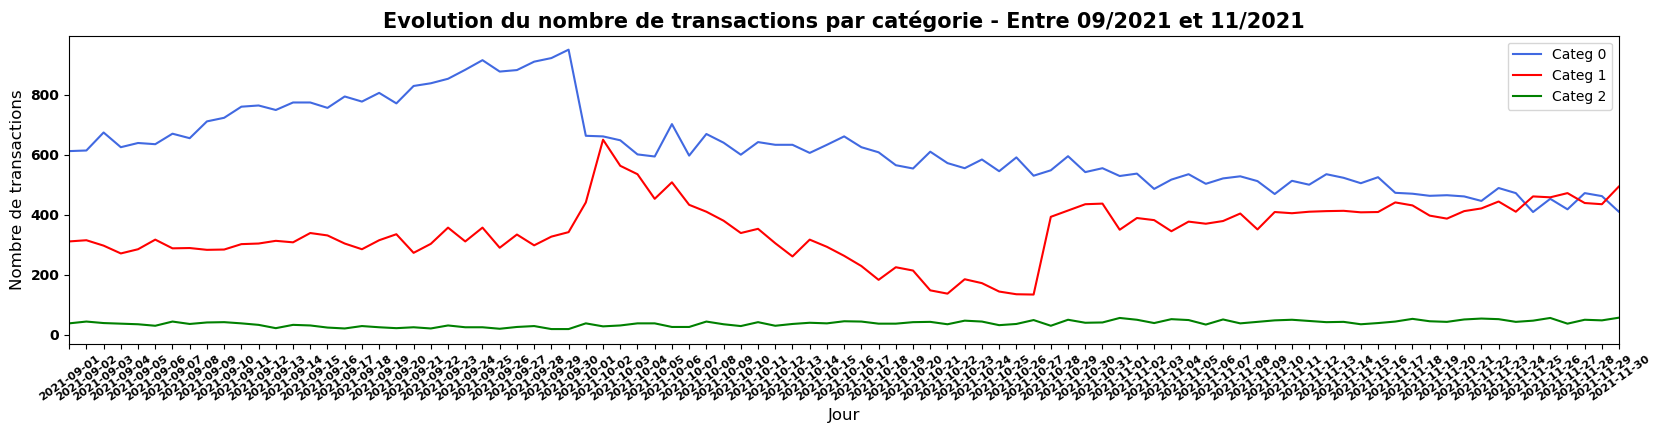

In [134]:
#Graphique représentant l'évolution du nombre de transactions par catégorie - Entre 09/2021 et 11/2021

#largeur et hauteur
plt.figure(figsize=(20, 4))

#Courbe du nombre de transactions journalières - Catégorie 0
plt.plot(nb_transac_categ_0['jour'], nb_transac_categ_0['Nombre'], linestyle='-', color='royalblue', label='Categ 0')

#Courbe nombre de transactions journalières - Catégorie 1
plt.plot(nb_transac_categ_1['jour'], nb_transac_categ_1['Nombre'], linestyle='-', color='red', label='Categ 1')

#Définition nombre de transactions journalières - Catégorie 2
plt.plot(nb_transac_categ_2['jour'], nb_transac_categ_2['Nombre'], linestyle='-', color='green', label='Categ 2')

#Définition d'une borne sur la période à afficher
plt.xlim('2021-09-01', '2021-11-30')

#Orientation des noms d'abscisses à 35°
plt.xticks(rotation = 35)

plt.title("Evolution du nombre de transactions par catégorie - Entre 09/2021 et 11/2021", fontsize=15,fontweight='bold')
plt.ylabel("Nombre de transactions", fontsize=12)
plt.xlabel("Jour", fontsize=12, multialignment='center')
plt.xticks(fontsize=8, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.legend()
plt.show()

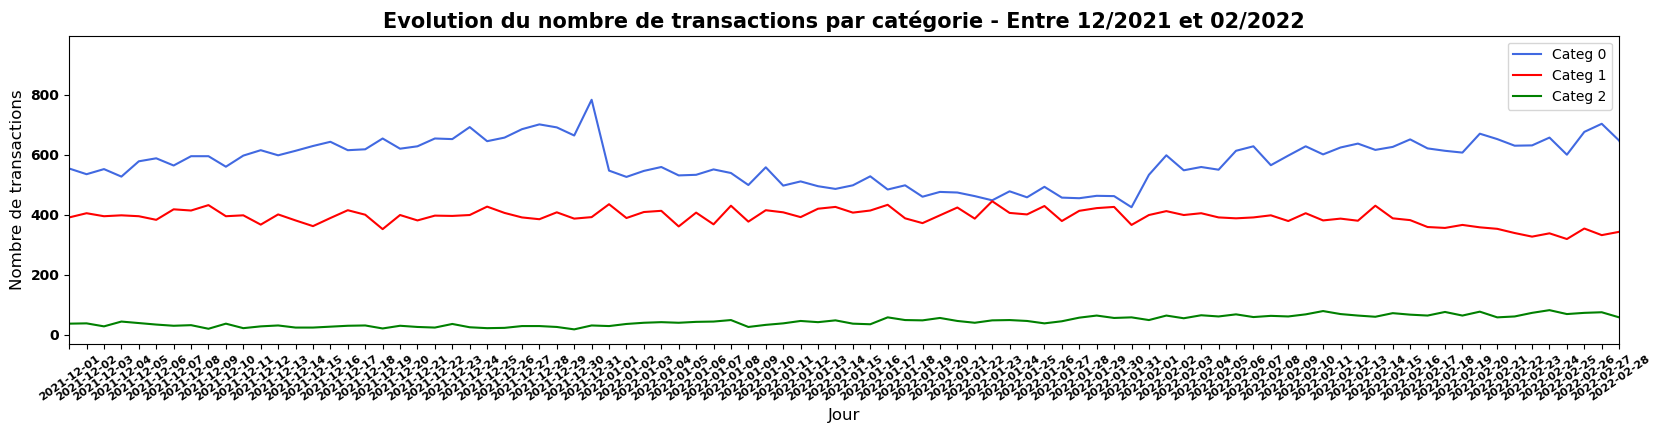

In [135]:
#Graphique représentant l'évolution du nombre de transactions par catégorie - Entre 12/2021 et 02/2022

#largeur et hauteur
plt.figure(figsize=(20, 4))

#Courbe du nombre de transactions journalières - Catégorie 0
plt.plot(nb_transac_categ_0['jour'], nb_transac_categ_0['Nombre'], linestyle='-', color='royalblue', label='Categ 0')

#Courbe nombre de transactions journalières - Catégorie 1
plt.plot(nb_transac_categ_1['jour'], nb_transac_categ_1['Nombre'], linestyle='-', color='red', label='Categ 1')

#Définition nombre de transactions journalières - Catégorie 2
plt.plot(nb_transac_categ_2['jour'], nb_transac_categ_2['Nombre'], linestyle='-', color='green', label='Categ 2')

#Définition d'une borne sur la période à afficher
plt.xlim('2021-12-01', '2022-02-28')

#Orientation des noms d'abscisses à 35°
plt.xticks(rotation = 35)

plt.title("Evolution du nombre de transactions par catégorie - Entre 12/2021 et 02/2022", fontsize=15,fontweight='bold')
plt.ylabel("Nombre de transactions", fontsize=12)
plt.xlabel("Jour", fontsize=12, multialignment='center')
plt.xticks(fontsize=8, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.legend()
plt.show()

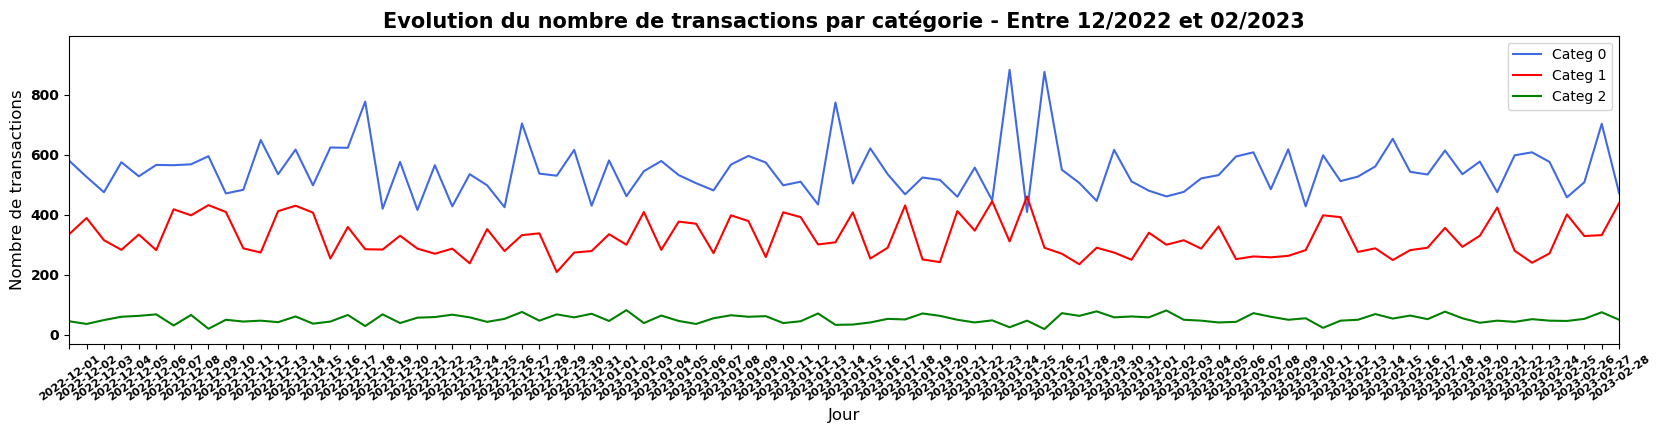

In [136]:
#Graphique représentant l'évolution du nombre de transactions par catégorie - Entre 12/2022 et 02/2023

#largeur et hauteur
plt.figure(figsize=(20, 4))

#Courbe du nombre de transactions journalières - Catégorie 0
plt.plot(nb_transac_categ_0['jour'], nb_transac_categ_0['Nombre'], linestyle='-', color='royalblue', label='Categ 0')

#Courbe nombre de transactions journalières - Catégorie 1
plt.plot(nb_transac_categ_1['jour'], nb_transac_categ_1['Nombre'], linestyle='-', color='red', label='Categ 1')

#Définition nombre de transactions journalières - Catégorie 2
plt.plot(nb_transac_categ_2['jour'], nb_transac_categ_2['Nombre'], linestyle='-', color='green', label='Categ 2')

#Définition d'une borne sur la période à afficher
plt.xlim('2022-12-01', '2023-02-28')

#Orientation des noms d'abscisses à 35°
plt.xticks(rotation = 35)

plt.title("Evolution du nombre de transactions par catégorie - Entre 12/2022 et 02/2023", fontsize=15,fontweight='bold')
plt.ylabel("Nombre de transactions", fontsize=12)
plt.xlabel("Jour", fontsize=12, multialignment='center')
plt.xticks(fontsize=8, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.legend()
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.5 - Nombre de produits vendus</h3>
</div>

In [138]:
print("Nombre total de produits vendus :",df_transactions_products_customers['id_prod'].value_counts().sum())

Nombre total de produits vendus : 687534


In [139]:
#Liste du nombre de produits vendus chaque mois
nombre_produits_mensuel_series = df_transactions_products_customers.groupby('mois-année')['id_prod'].count()
display(nombre_produits_mensuel_series.head())

mois-année
2021-03    28601
2021-04    28443
2021-05    28285
2021-06    26850
2021-07    24738
Name: id_prod, dtype: int64

In [140]:
#Conversion de la series en dataframe
nombre_produits_mensuel = nombre_produits_mensuel_series.to_frame().reset_index()
display(nombre_produits_mensuel.head())

mois-année  id_prod
0    2021-03    28601
1    2021-04    28443
2    2021-05    28285
3    2021-06    26850
4    2021-07    24738

In [141]:
#Renommer la colonne "id_prod" en "Nombre de produits vendus"
nombre_produits_mensuel = nombre_produits_mensuel.rename(columns={'id_prod': 'Nombre de produits vendus'})

In [142]:
#Affichage dataframe "nombre_produits_mensuel"
display(nombre_produits_mensuel.head())

mois-année  Nombre de produits vendus
0    2021-03                      28601
1    2021-04                      28443
2    2021-05                      28285
3    2021-06                      26850
4    2021-07                      24738

In [143]:
#Vérification de la somme du nombre de produits vendus (doit être égal = 687 534 produits)
nombre_produits_mensuel['Nombre de produits vendus'].sum()
# OK totaux cohérents

687534

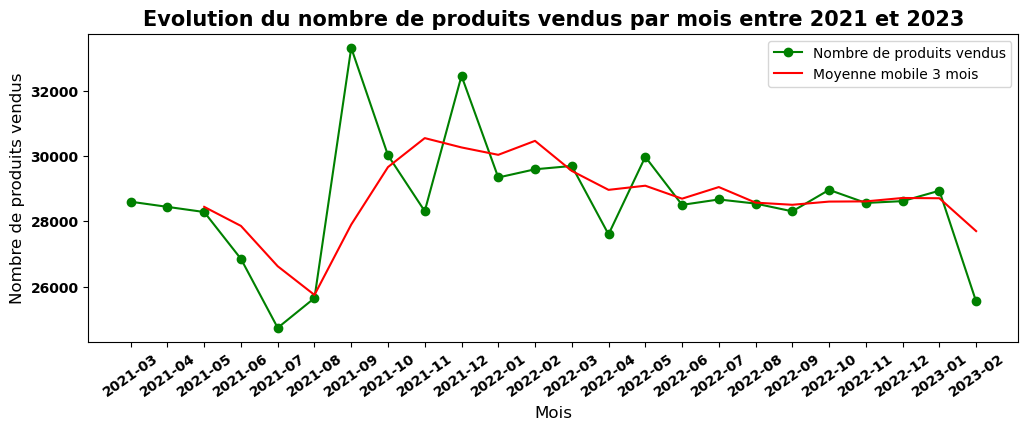

In [144]:
#Graphique représentant l'évolution du nombre de produits vendus par mois

#largeur et hauteur
plt.figure(figsize=(12, 4))

#Courbe représentant le nombre de produits vendus par mois
plt.plot(nombre_produits_mensuel['mois-année'], nombre_produits_mensuel['Nombre de produits vendus'], marker="o", linestyle='-', color='green', label='Nombre de produits vendus')

#Orientation des noms d'abscisses à 35°
plt.xticks(rotation = 35)

#Calcul de la moyenne mobile à 3 mois
plt.plot(nombre_produits_mensuel['mois-année'], nombre_produits_mensuel['Nombre de produits vendus'].rolling(3).mean(), linestyle='-', color='red', label='Moyenne mobile 3 mois')

plt.title("Evolution du nombre de produits vendus par mois entre 2021 et 2023", fontsize=15,fontweight='bold')
plt.ylabel("Nombre de produits vendus", fontsize=12)
plt.xlabel("Mois", fontsize=12, multialignment='center')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.legend()
plt.show()

Nous observons 3 pics d'augmentation du nombre de produits vendus par mois :

=> Entre 08/2021 et 09/202(même tendance à la hausse que le nombre de transactions)1 + 29.88 %5%

=> Entre 11/2021 et 12/2(même tendance à la hausse que le nombre de transactions)02+ 14.64 %58 %

=> Entre 04/2022 et 05(même tendance à la hausse que le nombre de transactions)/2+ 8.6 % +6.2%

In [146]:
produits_2021_08 = nombre_produits_mensuel.loc[nombre_produits_mensuel['mois-année']=='2021-08','Nombre de produits vendus'].item()
produits_2021_09 = nombre_produits_mensuel.loc[nombre_produits_mensuel['mois-année']=='2021-09','Nombre de produits vendus'].item()
print("Entre 08/2021 et 09/2021 :", "+",round((produits_2021_09-produits_2021_08)/produits_2021_08*100,2),"%")

Entre 08/2021 et 09/2021 : + 29.88 %


In [147]:
produits_2021_11 = nombre_produits_mensuel.loc[nombre_produits_mensuel['mois-année']=='2021-11','Nombre de produits vendus'].item()
produits_2021_12 = nombre_produits_mensuel.loc[nombre_produits_mensuel['mois-année']=='2021-12','Nombre de produits vendus'].item()
print("Entre 11/2021 et 12/2021 :", "+",round((produits_2021_12-produits_2021_11)/produits_2021_11*100,2),"%")

Entre 11/2021 et 12/2021 : + 14.64 %


In [148]:
produits_2022_04 = nombre_produits_mensuel.loc[nombre_produits_mensuel['mois-année']=='2022-04','Nombre de produits vendus'].item()
produits_2022_05 = nombre_produits_mensuel.loc[nombre_produits_mensuel['mois-année']=='2022-05','Nombre de produits vendus'].item()
print("Entre 04/2022 et 05/2022 :", "+",round((produits_2022_05-produits_2022_04)/produits_2022_04*100,2),"%")

Entre 04/2022 et 05/2022 : + 8.6 %


On observe également 5 grosses baisses du nombre de transactions mensuelles :

=> Entre 05/2021 et 07/2021 (même tendance à la baisse que le nombre de transactions): -17.47 %

=> Entre 12/2021 et 02/202(même tendance à la baisse que le nombre de transactions)2 -8.82 % %

=> Entre 03/2022 et 04/2(même tendance à la baisse que le nombre de transactions)02-7.05 %.0 %

=> Entre 05/2022 et 06(même tendance à la baisse que le nombre de transactions)/2-4.91 %-3.8 %

=> Entre 01/2023 et (même tendance à la baisse que le nombre de transactions)02-11.73 %-11.42 %

In [150]:
produits_2021_05 = nombre_produits_mensuel.loc[nombre_produits_mensuel['mois-année']=='2021-05','Nombre de produits vendus'].item()
produits_2022_07 = nombre_produits_mensuel.loc[nombre_produits_mensuel['mois-année']=='2021-07','Nombre de produits vendus'].item()
print("Entre 05/2021 et 07/2021 :", round((produits_2022_07-produits_2022_05)/produits_2022_05*100,2),"%")

Entre 05/2021 et 07/2021 : -17.47 %


In [151]:
produits_2021_12 = nombre_produits_mensuel.loc[nombre_produits_mensuel['mois-année']=='2021-12','Nombre de produits vendus'].item()
produits_2022_02 = nombre_produits_mensuel.loc[nombre_produits_mensuel['mois-année']=='2022-02','Nombre de produits vendus'].item()
print("Entre 12/2021 et 02/2022 :", round((produits_2022_02-produits_2021_12)/produits_2021_12*100,2),"%")

Entre 12/2021 et 02/2022 : -8.82 %


In [152]:
produits_2022_03 = nombre_produits_mensuel.loc[nombre_produits_mensuel['mois-année']=='2022-03','Nombre de produits vendus'].item()
produits_2022_04 = nombre_produits_mensuel.loc[nombre_produits_mensuel['mois-année']=='2022-04','Nombre de produits vendus'].item()
print("Entre 03/2022 et 04/2022 :", round((produits_2022_04-produits_2022_03)/produits_2022_03*100,2),"%")

Entre 03/2022 et 04/2022 : -7.05 %


In [153]:
produits_2022_05 = nombre_produits_mensuel.loc[nombre_produits_mensuel['mois-année']=='2022-05','Nombre de produits vendus'].item()
produits_2022_06 = nombre_produits_mensuel.loc[nombre_produits_mensuel['mois-année']=='2022-06','Nombre de produits vendus'].item()
print("Entre 05/2022 et 06/2022 :", round((produits_2022_06-produits_2022_05)/produits_2022_05*100,2),"%")

Entre 05/2022 et 06/2022 : -4.91 %


In [154]:
produits_2023_01 = nombre_produits_mensuel.loc[nombre_produits_mensuel['mois-année']=='2023-01','Nombre de produits vendus'].item()
produits_2023_02 = nombre_produits_mensuel.loc[nombre_produits_mensuel['mois-année']=='2023-02','Nombre de produits vendus'].item()
print("Entre 01/2023 et 02/2023 :", round((produits_2023_02-produits_2023_01)/produits_2023_01*100,2),"%")

Entre 01/2023 et 02/2023 : -11.73 %


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Zoom sur les références</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Les Tops</h3>
</div>

Nous allons générer les Top 10 suivants :

=> Top 10 des produits qui génèrent le plus de CA

=> Top 10 des produits les plus vendus en quantité

In [158]:
#Top 10 des produits les plus vendus en quantité

df_top10_quantite = (df_transactions_products_customers.groupby(df_transactions_products_customers['id_prod'])['id_prod'].count().reset_index(name='Nombre produits vendus').sort_values('Nombre produits vendus', ascending = False)).head(10)
display(df_top10_quantite)

id_prod  Nombre produits vendus
2591   1_369                    2340
2644   1_417                    2269
2641   1_414                    2246
2733   1_498                    2202
2653   1_425                    2163
2629   1_403                    2040
2640   1_413                    2036
2639   1_412                    2014
2632   1_406                    2003
2633   1_407                    2001

In [159]:
#Contrôle de cohérence (doit être égal = 687 534 produits)
df_top10_quantite['Nombre produits vendus'].sum()
# OK

21314

C:\Users\Eliane CAMUS\AppData\Local\Temp\ipykernel_11960\1026571212.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




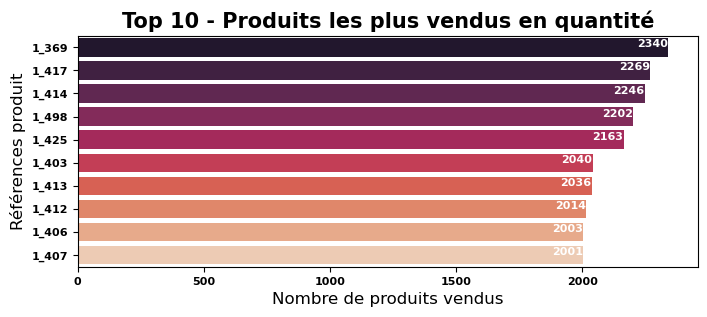

In [160]:
#Histogramme horizontal - Top 10 des produits les plus vendus en quantité

#largeur et hauteur
plt.figure(figsize=(8,3))

#Définition des barres
Graph_Top10_Ventes = sns.barplot(df_top10_quantite, orient='h', y='id_prod', x='Nombre produits vendus', palette='rocket')

plt.title('Top 10 - Produits les plus vendus en quantité', fontsize=15,fontweight='bold')
plt.ylabel("Références produit", fontsize=12)
plt.xlabel('Nombre de produits vendus', fontsize=12, multialignment='center')
plt.xticks(fontsize=8, fontweight='bold')
plt.yticks(fontsize=8, fontweight='bold')

# Commentaire : Affichage de la valeur au bout de chaque barre
Label_Graph_Top10_Ventes = df_top10_quantite['Nombre produits vendus'].tolist()
for i in range (10) : 
    plt.text(Label_Graph_Top10_Ventes[i], i, round(Label_Graph_Top10_Ventes[i],2), fontsize=8, fontweight='bold', ha='right', color='w')
    #'ha' pour générer un barplot horizontal (ha = horizontal alignment vs va = vertical alignment)

plt.show()

In [161]:
#Top 10 des produits qui génèrent le plus de CA
df_top10_CA = (df_transactions_products_customers.groupby(df_transactions_products_customers['id_prod'])['price'].sum().reset_index(name="Chiffre d'affaires").sort_values("Chiffre d'affaires", ascending = False)).head(10)
display(df_top10_CA)

id_prod  Chiffre d'affaires
3096   2_159            94893.50
3070   2_135            69334.95
3045   2_112            65407.76
3034   2_102            60736.78
3152   2_209            56971.86
2619   1_395            56617.47
2591   1_369            56136.60
3043   2_110            53846.25
2607   1_383            53834.43
2641   1_414            53522.18

C:\Users\Eliane CAMUS\AppData\Local\Temp\ipykernel_11960\3211301361.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




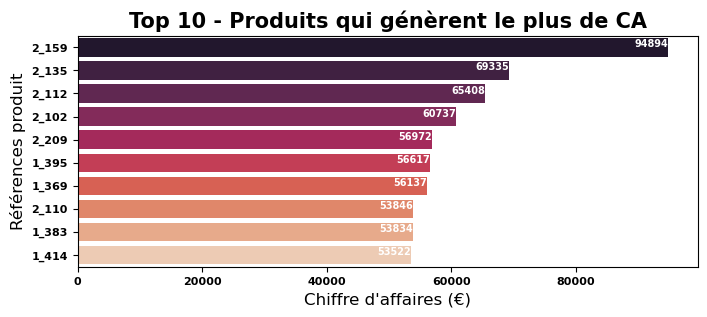

In [162]:
#Histogramme - Top 10 des produits qui génèrent le plus de CA

#largeur et hauteur
plt.figure(figsize=(8,3))

#Définition des barres
Graph_Top10_CA = sns.barplot(df_top10_CA, orient='h', y="id_prod", x="Chiffre d'affaires", palette='rocket')

plt.title('Top 10 - Produits qui génèrent le plus de CA', fontsize=15,fontweight='bold')
plt.ylabel("Références produit", fontsize=12)
plt.xlabel("Chiffre d'affaires (€)", fontsize=12, multialignment='center')
plt.xticks(fontsize=8, fontweight='bold')
plt.yticks(fontsize=8, fontweight='bold')

# Commentaire : Affichage de la valeur au bout de chaque barre
Label_Graph_Top10_CA = df_top10_CA["Chiffre d'affaires"].tolist()
for i in range (10) : 
    plt.text(Label_Graph_Top10_CA[i], i, round(Label_Graph_Top10_CA[i]), fontsize=7, fontweight='bold', ha='right', color='w')
    #'ha' pour générer un barplot horizontal (ha = horizontal alignment vs va = vertical alignment)

plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Les Flops</h3>
</div>

Nous allons générer les Flop 10 suivants :

=> Flop 10 des produits qui génèrent le moins de CA

=> Flop 10 des produits les moins vendus en quantité

In [165]:
#Top 10 des produits les moins vendus en quantité
#Remarque : Ce classement ne tient pas compte des 21 références qui n'ont pas fait l'objet d'une transaction au cours de la période d'observation.

df_flop10_quantite = df_transactions_products_customers.groupby(df_transactions_products_customers['id_prod'])['id_prod'].count().reset_index(name='Nombre produits vendus').sort_values('Nombre produits vendus').head(10)
display(df_flop10_quantite)

id_prod  Nombre produits vendus
1327  0_2201                       1
802   0_1728                       1
2108   0_833                       1
2079   0_807                       1
595   0_1539                       1
698   0_1633                       1
166   0_1151                       1
752   0_1683                       1
549   0_1498                       1
3263    2_98                       1

In [166]:
df_quantite = df_transactions_products_customers.groupby(df_transactions_products_customers['id_prod'])['id_prod'].count().reset_index(name='Nombre produits vendus').sort_values('Nombre produits vendus')
df_quantite

#Contrôle de cohérence (doit être = 687 534)
df_quantite['Nombre produits vendus'].sum()
# OK

687534

In [167]:
#Nombre de produits vendus qu'une seule fois entre 2021 et 2023

nombre_produits_1vente = df_flop10_quantite.loc[df_flop10_quantite['Nombre produits vendus']==1].value_counts().sum()
print("Nombre de produits vendus qu'une seule fois :", nombre_produits_1vente)
print('Cela représente', round(nombre_produits_1vente/df_quantite['Nombre produits vendus'].sum()*100,2), '% du total des produits vendus.')

Nombre de produits vendus qu'une seule fois : 10
Cela représente 0.0 % du total des produits vendus.


C:\Users\Eliane CAMUS\AppData\Local\Temp\ipykernel_11960\3234974285.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




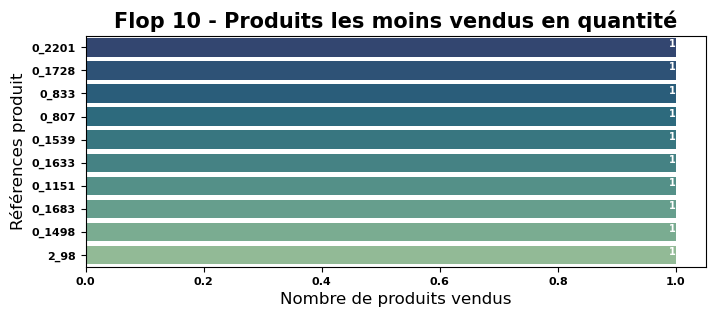

In [168]:
#Histogramme - Flop 10 des produits les moins vendus en quantité

#largeur et hauteur
plt.figure(figsize=(8,3))

#Définition des barres
Graph_Flop10_Ventes = sns.barplot(df_flop10_quantite, y='id_prod', x='Nombre produits vendus', palette='crest_r')

plt.title('Flop 10 - Produits les moins vendus en quantité', fontsize=15,fontweight='bold')
plt.ylabel("Références produit", fontsize=12)
plt.xlabel('Nombre de produits vendus', fontsize=12, multialignment='center')
plt.xticks(fontsize=8, fontweight='bold')
plt.yticks(fontsize=8, fontweight='bold')

# Commentaire : Affichage de la valeur au bout de chaque barre
Label_Graph_Flop10_Ventes = df_flop10_quantite['Nombre produits vendus'].tolist()
for i in range (10) : 
    plt.text(Label_Graph_Flop10_Ventes[i], i, round(Label_Graph_Flop10_Ventes[i],2), fontsize=7, fontweight='bold', ha='right', color='w')
    #'ha' pour générer un barplot horizontal (ha = horizontal alignment vs va = vertical alignment)

plt.show()

In [169]:
#Top 10 des produits qui génèrent le moins de CA
df_flop10_CA = df_transactions_products_customers.groupby(df_transactions_products_customers['id_prod'])['price'].sum().reset_index(name="Chiffre d'affaires").sort_values("Chiffre d'affaires").head(10)
display(df_flop10_CA)

id_prod  Chiffre d'affaires
595   0_1539                0.99
313   0_1284                1.38
719   0_1653                1.98
1784   0_541                1.99
665   0_1601                1.99
2079   0_807                1.99
802   0_1728                2.27
549   0_1498                2.48
2179   0_898                2.54
925   0_1840                2.56

C:\Users\Eliane CAMUS\AppData\Local\Temp\ipykernel_11960\24155197.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




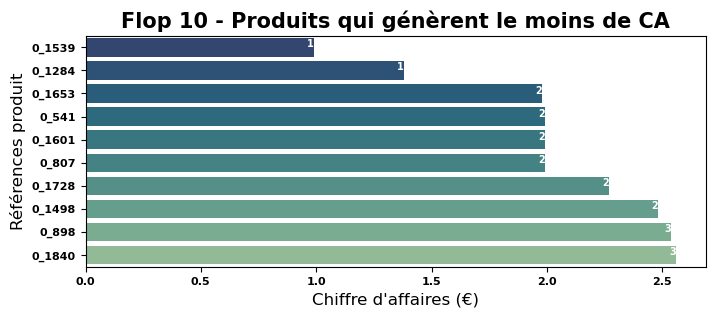

In [170]:
#Histogramme - Flop 10 des produits qui génèrent le moins de CA

#largeur et hauteur
plt.figure(figsize=(8,3))

#Définition des barres
Graph_flop10_CA = sns.barplot(df_flop10_CA, orient='h', y="id_prod", x="Chiffre d'affaires", palette='crest_r')

plt.title('Flop 10 - Produits qui génèrent le moins de CA', fontsize=15,fontweight='bold')
plt.ylabel("Références produit", fontsize=12)
plt.xlabel("Chiffre d'affaires (€)", fontsize=12, multialignment='center')
plt.xticks(fontsize=8, fontweight='bold')
plt.yticks(fontsize=8, fontweight='bold')

# Commentaire : Affichage de la valeur au bout de chaque barre
Label_Graph_Flop10_CA = df_flop10_CA["Chiffre d'affaires"].tolist()
for i in range (10) : 
    plt.text(Label_Graph_Flop10_CA[i], i, round(Label_Graph_Flop10_CA[i]), fontsize=7, fontweight='bold', ha='right', color='w')
    #'ha' pour générer un barplot horizontal (ha = horizontal alignment vs va = vertical alignment)

plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - La répartition des ventes par catégorie</h3>
</div>

Nous allons analyser les répartitions suivantes :

=> Répartition des ventes en quantité par catégorie

=> Répartition des ventes en CA par catégorie

=> Répartition des prix de vente par catégorie (boxplot)

In [173]:
#Répartition des ventes en quantité par catégorie

quantité_categorie = df_transactions_products_customers.groupby(['categ'])['id_prod'].count().reset_index(name='Ventes')
display(quantité_categorie)

categ  Ventes
0  Categ_0  415459
1  Categ_1  235592
2  Categ_2   36483

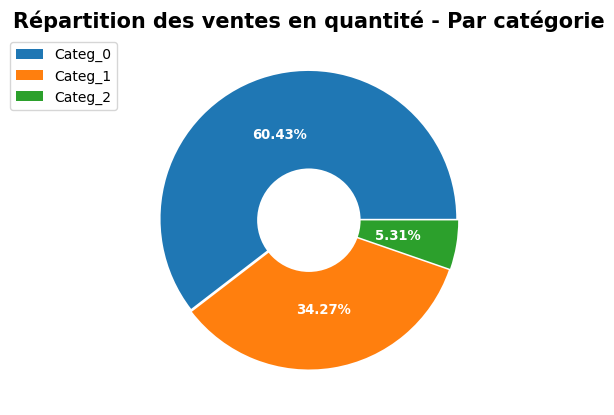

In [174]:
#Graphique en camembert - Répartition des ventes en quantité par catégorie

#Définition du pie chart
quantité_categorie.plot(kind='pie', y='Ventes', labels = quantité_categorie['categ'], legend=True, autopct='%.2f%%',  textprops={'color':'white', 'fontweight':'bold', 'size':9.5}, explode=[0.01, 0.01, 0.01])

#Titre et légende
plt.title("Répartition des ventes en quantité - Par catégorie", fontsize=15,fontweight='bold')
plt.legend(bbox_to_anchor=(0,1))

#Suppression du nom de l'axe Y
plt.ylabel(None)

#Ajout d'un centre vide blanc pour un format de graphique camembert de type "donut pie"
centre_circle = plt.Circle((0, 0), 0.35, fc='white')
#Affichage du rond blanc au centre du graphique en camembert (gcf = get current figure)
fig = plt.gcf()
#Ajout du cercle blanc au centre du graphique en camembert principal. Fonction "add_artist" pour ajouter un nouvel objet à un graphique.
fig.gca().add_artist(centre_circle)

plt.show()

In [175]:
#Répartition du CA par catégorie

CA_categorie = df_transactions_products_customers.groupby(['categ'])['price'].sum().reset_index(name='CA')
display(CA_categorie)

categ          CA
0  Categ_0  4419730.97
1  Categ_1  4827657.11
2  Categ_2  2780275.02

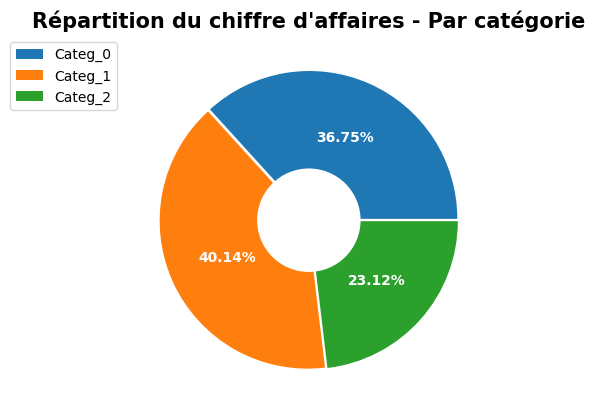

In [176]:
#Graphique en camembert - Répartition du CA par catégorie

#Définition du pie chart
CA_categorie.plot(kind='pie', y='CA', labels = CA_categorie['categ'], legend=True, autopct='%.2f%%', textprops={'color':'white', 'fontweight':'bold'}, explode=[0.01, 0.01, 0.01])

#Titre et légende
plt.title("Répartition du chiffre d'affaires - Par catégorie", fontsize=15, fontweight='bold')
plt.legend(bbox_to_anchor=(0,1))

#Suppression du nom de l'axe Y
plt.ylabel(None)

#Ajout d'un centre vide blanc pour un format de graphique camembert de type "donut pie"
centre_circle = plt.Circle((0, 0), 0.35, fc='white')
#Affichage du rond blanc au centre du graphique en camembert (gcf = get current figure)
fig = plt.gcf()
#Ajout du cercle blanc au centre du graphique en camembert principal. Fonction "add_artist" pour ajouter un nouvel objet à un graphique.
fig.gca().add_artist(centre_circle)

plt.show()

C:\Users\Eliane CAMUS\AppData\Local\Temp\ipykernel_11960\107604344.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




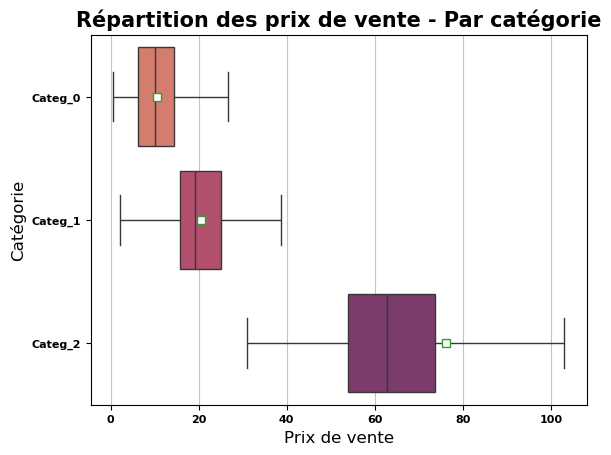

In [177]:
#Répartition des prix de vente par catégorie (boxplot)

sns.boxplot(df_transactions_products_customers, y='categ', x='price', showfliers=False, showmeans=True, meanprops={"marker":"s","markerfacecolor":"white"}, palette="flare")
plt.title('Répartition des prix de vente - Par catégorie', fontsize=15, fontweight='bold')
plt.ylabel('Catégorie', fontsize=12, multialignment='center')
plt.xlabel('Prix de vente', fontsize=12, multialignment='center')
plt.xticks(fontsize=8, fontweight='bold')
plt.yticks(fontsize=8, fontweight='bold')
plt.grid(axis='x', alpha=0.75)
plt.show()

Pour rappel, dans la partie "4.1 - Chiffre d'affaires", nous avions détecté une forte baisse de CA sur :

=> la période de 02/2022 à 04/2022 inclus

=> et plus particulièrement les 5 jours suivants : 07/03, 18/03, 25/03, 18/04 et 25/04

Nous allons calculer la répartition des ventes et du CA par catégorie sur cette période (à la fois par mois et par jour)

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Informations sur les profils des clients</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 6.1 - Répartition du chiffre d'affaires pour les clients BtoB</h3>
</div>

L'information n'est pas donnée dans les bases : nous allons faire ressortir les plus gros clients en termes de CA et les isoler en considérant que ce sont les clients BtoB.

In [182]:
#Affichage des plus gros clients en termes de CA

CA_par_client_series = df_transactions_products_customers.groupby(['client_id'])['price'].sum().sort_values(ascending=False)
display(CA_par_client_series.head())

client_id
c_1609    326039.89
c_4958    290227.03
c_6714    153918.60
c_3454    114110.57
c_1570      5285.82
Name: price, dtype: float64

In [183]:
#Conversion de la series en dataframe
CA_par_client = CA_par_client_series.to_frame().reset_index()
display(CA_par_client.head(10))

client_id      price
0    c_1609  326039.89
1    c_4958  290227.03
2    c_6714  153918.60
3    c_3454  114110.57
4    c_1570    5285.82
5    c_3263    5276.87
6    c_2140    5260.18
7    c_2899    5214.05
8    c_7319    5155.77
9    c_7959    5135.75

In [184]:
#On isole les 4 premiers clients en termes de CA : liste des clients BtoB
CA_clients_B2B = CA_par_client.loc[(CA_par_client['client_id']== 'c_1609')|(CA_par_client['client_id']=='c_4958')|(CA_par_client['client_id']=='c_6714')|(CA_par_client['client_id']=='c_3454')]
display(CA_clients_B2B)

client_id      price
0    c_1609  326039.89
1    c_4958  290227.03
2    c_6714  153918.60
3    c_3454  114110.57

C:\Users\Eliane CAMUS\AppData\Local\Temp\ipykernel_11960\1960493696.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




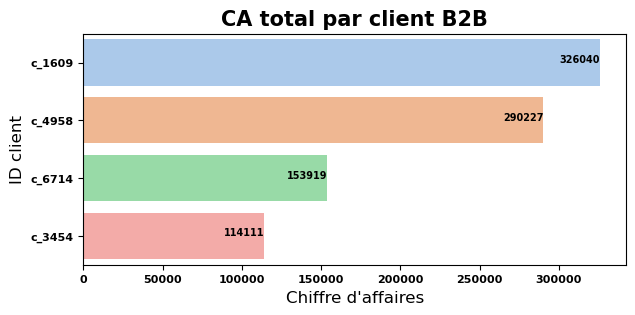

In [185]:
#Graphique en barres représentant le CA total pour chaque client B2B

#largeur et hauteur
plt.figure(figsize=(7,3))

#Définition des barres pour le CA par client B2B
Graph_CA_par_client = sns.barplot(CA_clients_B2B, y='client_id', x='price', palette='pastel')

plt.title('CA total par client B2B', fontsize=15,fontweight='bold')
plt.ylabel('ID client', fontsize=12)
plt.xlabel("Chiffre d'affaires", fontsize=12, multialignment='center')
plt.xticks(fontsize=8, fontweight='bold')
plt.yticks(fontsize=8, fontweight='bold')

# Commentaire : Affichage de la valeur au bout de chaque barre
Label_Graph_CA_par_client = CA_clients_B2B['price'].tolist()
for i in range (4) : 
    plt.text(Label_Graph_CA_par_client[i], i, round(Label_Graph_CA_par_client[i]), fontsize=7, fontweight='bold', ha='right')
    #'ha' pour générer un barplot horizontal (ha = horizontal alignment vs va = vertical alignment)

plt.show()

In [186]:
#Création nouveau dataframe global sans les 4 clients BtoB pour le reste des analyses (afin de ne pas biaiser les résultats)
df_transactions_products_customers_no_BtoB = df_transactions_products_customers.copy()

In [187]:
#Suppression des lignes de clients BtoB du dataframe global issu des fusions
df_transactions_products_customers_no_BtoB.drop(df_transactions_products_customers_no_BtoB[(df_transactions_products_customers_no_BtoB['client_id']=='c_1609') | (df_transactions_products_customers_no_BtoB['client_id']=='c_4958') | (df_transactions_products_customers_no_BtoB['client_id']=='c_6714') | (df_transactions_products_customers_no_BtoB['client_id']=='c_3454')].index, inplace = True)

In [188]:
#Affichage nouveau dataframe sans les 4 clients BtoB
df_transactions_products_customers_no_BtoB.info()

<class 'pandas.core.frame.DataFrame'>
Index: 640734 entries, 0 to 687533
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     640734 non-null  object        
 1   date        640734 non-null  datetime64[ns]
 2   session_id  640734 non-null  object        
 3   client_id   640734 non-null  object        
 4   price       640734 non-null  float64       
 5   categ       640734 non-null  object        
 6   sex         640734 non-null  object        
 7   birth       640734 non-null  int64         
 8   mois-année  640734 non-null  object        
 9   semaine     640734 non-null  object        
 10  jour        640734 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 58.7+ MB


In [189]:
df_transactions_products_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687534 entries, 0 to 687533
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     687534 non-null  object        
 1   date        687534 non-null  datetime64[ns]
 2   session_id  687534 non-null  object        
 3   client_id   687534 non-null  object        
 4   price       687534 non-null  float64       
 5   categ       687534 non-null  object        
 6   sex         687534 non-null  object        
 7   birth       687534 non-null  int64         
 8   mois-année  687534 non-null  object        
 9   semaine     687534 non-null  object        
 10  jour        687534 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 57.7+ MB


In [190]:
#Vérification de la suppression des 4 clients BtoB
df_transactions_products_customers_no_BtoB.loc[(df_transactions_products_customers_no_BtoB['client_id']== 'c_1609')|(df_transactions_products_customers_no_BtoB['client_id']=='c_4958')|(df_transactions_products_customers_no_BtoB['client_id']=='c_6714')|(df_transactions_products_customers_no_BtoB['client_id']=='c_3454')]

Empty DataFrame
Columns: [id_prod, date, session_id, client_id, price, categ, sex, birth, mois-année, semaine, jour]
Index: []

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 6.2 - Courbe de Lorenz</h3>
</div>

In [192]:
#Création de la courbe de Lorenz : CA + Client_id (=population)
CA_client_lorenz_series = df_transactions_products_customers.groupby(['client_id'])['price'].sum()
CA_client_lorenz_series.sort_values()

#Conversion de la series en dataframe
CA_client_lorenz = CA_client_lorenz_series.to_frame().reset_index()
display(CA_client_lorenz.head())

client_id    price
0       c_1   629.02
1      c_10  1353.60
2     c_100   254.85
3    c_1000  2291.88
4    c_1001  1823.85

In [193]:
#Array des valeurs de CA pour chaque client
CA_client_lorenz['price'].values 

#Nombre de clients
n = len(CA_client_lorenz) 
lorenz = np.cumsum(np.sort(CA_client_lorenz['price'])) / CA_client_lorenz['price'].sum()

# La courbe de Lorenz commence à 0
lorenz = np.append([0],lorenz) 

#Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
xaxis = np.linspace(0-1/n,1+1/n,n+1) 

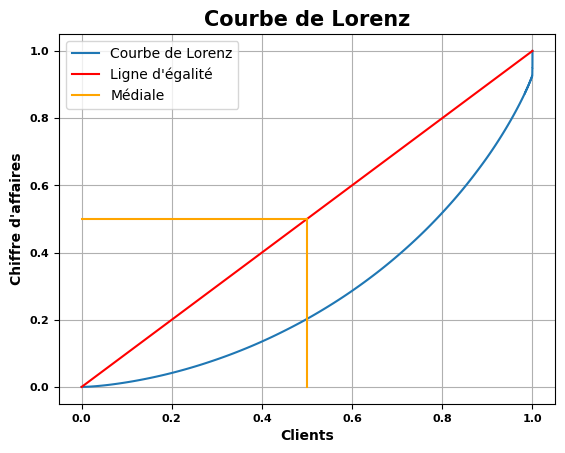

In [194]:
#Courbe de Lorenz représentant le cumul des clients et de leur CA associé
#Permet de représenter la répartition d'une variable au sein d'une population (si elle est égalitaire ou non).
plt.plot(xaxis,lorenz,drawstyle='steps-post', label="Courbe de Lorenz")

#Courbe d'égalité parfaite
plt.plot([0, 1], [0, 1], color = 'red', label="Ligne d'égalité")

#Médiale
plt.plot([0.5, 0.5], [0, 0.5], color = 'orange', label="Médiale")
plt.plot([0, 0.5], [0.5, 0.5], color = 'orange')

plt.title('Courbe de Lorenz', fontsize=15, fontweight='bold')
plt.xlabel('Clients', fontsize=10, fontweight='bold')
plt.ylabel("Chiffre d'affaires", fontsize=10, fontweight='bold')
plt.xticks(fontsize=8, fontweight='bold')
plt.yticks(fontsize=8, fontweight='bold')
plt.legend()
plt.grid()
plt.show()

A la lecture de la courbe, on constate une inégalité dans la répartition :
- 50% du CA global est réalisé par 80% des clients : la librairie doit déjà toucher presque la totalité des clients pour réaliser ne serait-ce que 50% de son CA
- 80% du CA global est réalisé par 95% des clients : soit la quasi totalité des clients
- Portion de courbe linéaire à 100% des clients : une infime partie des clients réalise environ 10% du CA


In [196]:
#Calcul de l'indice de Gini : "Les X % les plus riches possèdent Y % de la richesse mondiale"
#Permet d'évaluer de façon chiffrée une variable au sein d'une population (si elle est égalitaire ou non). 
#Correspond à deux fois l'aire sous la courbe de Lorenz

AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
print('Indice de Gini :',round(gini,2))

Indice de Gini : 0.44


L'indice de Gini est de 0.44 ici, plus proche de 0 que de 1 . On penche pour une répartition moyennement égalitaire, mais plus égalitaire que pas du tout.

Si indice de Gini = 1 => répartition non égalitaire

Si indice de Gini = 0 => répartition égalitaire

In [198]:
#Calcul de la part de CA totale que représentent uniquement les clients BtoB
print('CA total - 4 clients BtoB :', round(CA_clients_B2B['price'].sum()), '€')
print('CA global :', round(df_transactions_products_customers['price'].sum()), '€')
print('Le CA relatif aux 4 clients BtoB représente', round((CA_clients_B2B['price'].sum()/df_transactions_products_customers['price'].sum()*100), 2) , '% du CA global.')

CA total - 4 clients BtoB : 884296 €
CA global : 12027663 €
Le CA relatif aux 4 clients BtoB représente 7.35 % du CA global.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 6.3 - Répartition de la clientèle par tranche d'âge</h3>
</div>

Nous allons opérer 2 répartitions de la clientèle par tranche d'âge :

- En nombre
- En CA (chiffre d'affaires)

Répartition de la clientèle par tranche d'âge - En nombre (hors 4 clients BtoB) :

In [202]:
#Définition de l'année actuelle : 2025
current_year = pd.to_datetime('today').strftime('%Y')
pd.to_numeric(current_year, errors='coerce')

#Création nouvelle colonne pour le calcul de l'âge des clients
df_transactions_products_customers_no_BtoB['age'] = pd.to_numeric(current_year, errors='coerce') - df_transactions_products_customers_no_BtoB['birth']
display(df_transactions_products_customers_no_BtoB.head())

id_prod                       date session_id client_id  price    categ sex  \
0  0_1259 2021-03-01 00:01:07.843138        s_1     c_329  11.99  Categ_0   f   
1  0_1390 2021-03-01 00:02:26.047414        s_2     c_664  19.37  Categ_0   m   
2  0_1352 2021-03-01 00:02:38.311413        s_3     c_580   4.50  Categ_0   m   
3  0_1458 2021-03-01 00:04:54.559692        s_4    c_7912   6.55  Categ_0   f   
4  0_1358 2021-03-01 00:05:18.801198        s_5    c_2033  16.49  Categ_0   f   

   birth mois-année  semaine        jour  age  
0   1967    2021-03  2021-09  2021-03-01   58  
1   1960    2021-03  2021-09  2021-03-01   65  
2   1988    2021-03  2021-09  2021-03-01   37  
3   1989    2021-03  2021-09  2021-03-01   36  
4   1956    2021-03  2021-09  2021-03-01   69

In [203]:
print('Plage des âges des clients [min, max] :', df_transactions_products_customers_no_BtoB['age'].min(), 'ans ,' , df_transactions_products_customers_no_BtoB['age'].max(), 'ans')

Plage des âges des clients [min, max] : 21 ans , 96 ans


In [204]:
#Création dataframe [client_id, age]
df_client_id_age = df_transactions_products_customers_no_BtoB.loc[:, ['client_id', 'age']].sort_values(by='age')
df_client_id_age.drop_duplicates(keep = 'first', inplace=True)
display(df_client_id_age.reset_index(drop=True))

client_id  age
0       c_7257   21
1       c_4234   21
2       c_4419   21
3        c_696   21
4       c_2785   21
...        ...  ...
8591     c_353   95
8592    c_4679   95
8593    c_8362   96
8594     c_577   96
8595    c_5302   96

[8596 rows x 2 columns]

Avant de générer les graphiques, nous allons d'abord déterminer le nombre de tranches que nous souhaitons avoir : 

- Tranche 1 : 18-25 ans
- Tranche 2 : 25-35 ans
- Tranche 3 : 35-45 ans
- Tranche 4 : 45-60 ans
- Tranche 5 : 60-70 ans
- Tranche 6 : >=70 ans

In [206]:
#Contrôle de cohérence : Vérification du nombre de clients uniques
print('Nombre total de clients dans "df_client_id_age" :', df_client_id_age['client_id'].nunique())
print('Nombre total de clients dans "df_transactions_products_customers" :', df_transactions_products_customers_no_BtoB['client_id'].nunique())
print('OK les totaux cadrent.')

Nombre total de clients dans "df_client_id_age" : 8596
Nombre total de clients dans "df_transactions_products_customers" : 8596
OK les totaux cadrent.


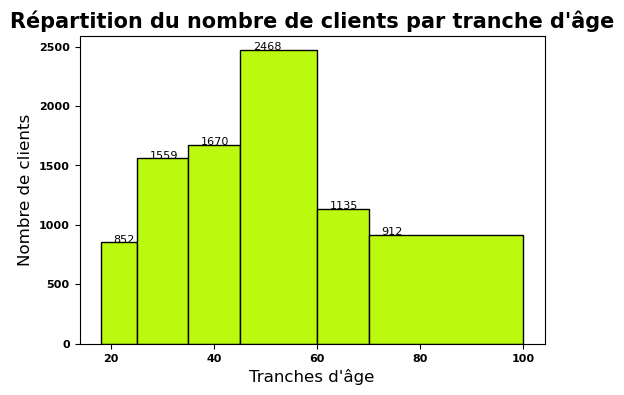

In [207]:
#Graphique : Histogramme montrant la répartition de la clientèle par tranche d'âge

#largeur et hauteur
plt.figure(figsize=(6,4))

#Définition des barres d'histogramme
Graph_clients_par_tranche_age = plt.hist(df_client_id_age['age'], bins=[18, 25, 35, 45, 60, 70, 100], color="#BBF90F", edgecolor='black')

plt.title("Répartition du nombre de clients par tranche d'âge", fontsize=15,fontweight='bold')
plt.ylabel("Nombre de clients", fontsize=12)
plt.xlabel("Tranches d'âge", fontsize=12, multialignment='center')
plt.xticks(fontsize=8, fontweight='bold')
plt.yticks(fontsize=8, fontweight='bold')

#Affichage de la valeur au-dessus de chaque barre
for i in range(6):
    plt.text(Graph_clients_par_tranche_age[1][i]+2.5, Graph_clients_par_tranche_age[0][i], round(Graph_clients_par_tranche_age[0][i]), fontsize=8)

plt.show()

In [208]:
#Création dataframe avec le nombre de clients par âge
df_nombre_clients_par_tranche_age = df_client_id_age.groupby(['age'])['client_id'].count().reset_index(name='Nombre de clients')
display(df_nombre_clients_par_tranche_age.head())

age  Nombre de clients
0   21                437
1   22                145
2   23                145
3   24                125
4   25                136

In [209]:
#Ajout des tranches d'âge dans une nouvelle colonne "age_range"
df_nombre_clients_par_tranche_age['age_range'] = '18-25'
display(df_nombre_clients_par_tranche_age.head())

age  Nombre de clients age_range
0   21                437     18-25
1   22                145     18-25
2   23                145     18-25
3   24                125     18-25
4   25                136     18-25

In [210]:
#Modification des valeurs en colonne "age_range" en fonction de chacune des 6 tranches
df_nombre_clients_par_tranche_age.loc[df_nombre_clients_par_tranche_age['age']>= 25, 'age_range'] = '25-35'
df_nombre_clients_par_tranche_age.loc[df_nombre_clients_par_tranche_age['age']>= 35, 'age_range'] = '35-45'
df_nombre_clients_par_tranche_age.loc[df_nombre_clients_par_tranche_age['age']>= 45, 'age_range'] = '45-60'
df_nombre_clients_par_tranche_age.loc[df_nombre_clients_par_tranche_age['age']>= 60, 'age_range'] = '60-70'
df_nombre_clients_par_tranche_age.loc[df_nombre_clients_par_tranche_age['age']>= 70, 'age_range'] = '>=70'

In [211]:
#Suppression de la colonne "age"
df_nombre_clients_par_tranche_age.drop('age', axis=1)

Nombre de clients age_range
0                 437     18-25
1                 145     18-25
2                 145     18-25
3                 125     18-25
4                 136     25-35
..                ...       ...
71                  8      >=70
72                  6      >=70
73                  4      >=70
74                  4      >=70
75                  3      >=70

[76 rows x 2 columns]

In [212]:
#Regroupement du nombre de clients par tranche d'âge et conversion series en dataframe
df_nombre_clients_par_tranche_age = df_nombre_clients_par_tranche_age.groupby(['age_range'])['Nombre de clients'].sum().to_frame().reset_index()
display(df_nombre_clients_par_tranche_age)

age_range  Nombre de clients
0     18-25                852
1     25-35               1559
2     35-45               1670
3     45-60               2468
4     60-70               1135
5      >=70                912

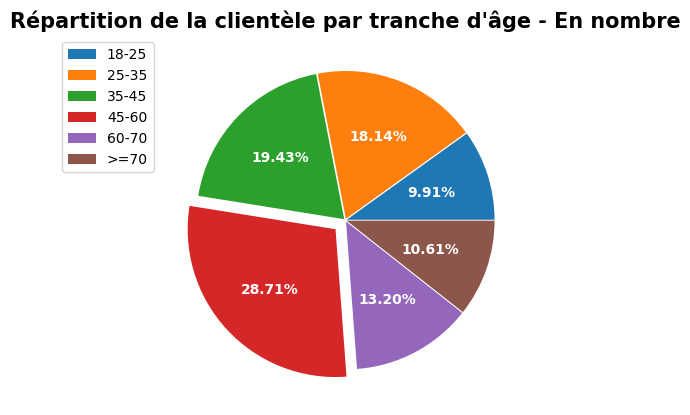

In [213]:
#Graphique en camembert : Répartition de la clientèle par tranche d'âge - En nombre

#Définition du pie chart
df_nombre_clients_par_tranche_age.plot(kind='pie', y='Nombre de clients', labels = df_nombre_clients_par_tranche_age['age_range'], legend=True, autopct='%.2f%%', textprops={'color':'white', 'fontweight':'bold'}, explode=[0.01, 0.01, 0.01, 0.09, 0.01, 0.01])

#Titre et légende
plt.title("Répartition de la clientèle par tranche d'âge - En nombre", fontsize=15, fontweight='bold')
plt.legend(bbox_to_anchor=(0,1))

#Suppression du nom de l'axe Y
plt.ylabel(None)

plt.show()

Répartition de la clientèle par tranche d'âge - En CA (hors 4 clients BtoB) : 

In [215]:
display(df_transactions_products_customers_no_BtoB.head())

id_prod                       date session_id client_id  price    categ sex  \
0  0_1259 2021-03-01 00:01:07.843138        s_1     c_329  11.99  Categ_0   f   
1  0_1390 2021-03-01 00:02:26.047414        s_2     c_664  19.37  Categ_0   m   
2  0_1352 2021-03-01 00:02:38.311413        s_3     c_580   4.50  Categ_0   m   
3  0_1458 2021-03-01 00:04:54.559692        s_4    c_7912   6.55  Categ_0   f   
4  0_1358 2021-03-01 00:05:18.801198        s_5    c_2033  16.49  Categ_0   f   

   birth mois-année  semaine        jour  age  
0   1967    2021-03  2021-09  2021-03-01   58  
1   1960    2021-03  2021-09  2021-03-01   65  
2   1988    2021-03  2021-09  2021-03-01   37  
3   1989    2021-03  2021-09  2021-03-01   36  
4   1956    2021-03  2021-09  2021-03-01   69

In [216]:
#Création du dataframe avec le CA par âge
df_CA_par_tranche_age = df_transactions_products_customers_no_BtoB.loc[:, ['age', 'price']].sort_values(by='age')
df_CA_par_tranche_age.reset_index(drop=True).head()

age  price
0   21  13.79
1   21  16.99
2   21  11.01
3   21  12.71
4   21  48.99

In [217]:
#Regroupement par client_id
df_CA_par_tranche_age = df_CA_par_tranche_age.groupby(['age'])['price'].sum().to_frame().reset_index()
display(df_CA_par_tranche_age.head())

age      price
0   21  616418.15
1   22  180680.89
2   23  186791.83
3   24  181233.57
4   25  167388.08

In [218]:
#Contrôle de cohérence
print('Somme colonne "Price" du dataframe "df_transactions_products_customers" :', df_transactions_products_customers_no_BtoB['price'].sum())
print('Somme colonne "Price" du dataframe "df_CA_par_tranche_age" :', df_CA_par_tranche_age['price'].sum())

Somme colonne "Price" du dataframe "df_transactions_products_customers" : 11143367.009999996
Somme colonne "Price" du dataframe "df_CA_par_tranche_age" : 11143367.01


In [219]:
#Ajout des tranches d'âge dans une nouvelle colonne "age_range"
df_CA_par_tranche_age['age_range'] = '18-25'
display(df_CA_par_tranche_age.head())

age      price age_range
0   21  616418.15     18-25
1   22  180680.89     18-25
2   23  186791.83     18-25
3   24  181233.57     18-25
4   25  167388.08     18-25

In [220]:
#Modification des valeurs en colonne "age_range" en fonction de chacune des 6 tranches
df_CA_par_tranche_age.loc[df_CA_par_tranche_age['age']>= 25, 'age_range'] = '25-35'
df_CA_par_tranche_age.loc[df_CA_par_tranche_age['age']>= 35, 'age_range'] = '35-45'
df_CA_par_tranche_age.loc[df_CA_par_tranche_age['age']>= 45, 'age_range'] = '45-60'
df_CA_par_tranche_age.loc[df_CA_par_tranche_age['age']>= 60, 'age_range'] = '60-70'
df_CA_par_tranche_age.loc[df_CA_par_tranche_age['age']>= 70, 'age_range'] = '>=70'

In [221]:
#Suppression de la colonne "age"
df_CA_par_tranche_age.drop('age', axis=1).head()

price age_range
0  616418.15     18-25
1  180680.89     18-25
2  186791.83     18-25
3  181233.57     18-25
4  167388.08     25-35

In [222]:
#Colonne "price" renommée "CA"
df_CA_par_tranche_age.rename(columns={'price': 'CA'}, inplace=True)

In [223]:
#Regroupement du CA par tranche d'âge et conversion series en dataframe
df_CA_par_tranche_age = df_CA_par_tranche_age.groupby(['age_range'])['CA'].sum().to_frame().reset_index()
display(df_CA_par_tranche_age)

age_range          CA
0     18-25  1165124.44
1     25-35  2107223.17
2     35-45  2657911.90
3     45-60  3274882.90
4     60-70  1109324.37
5      >=70   828900.23

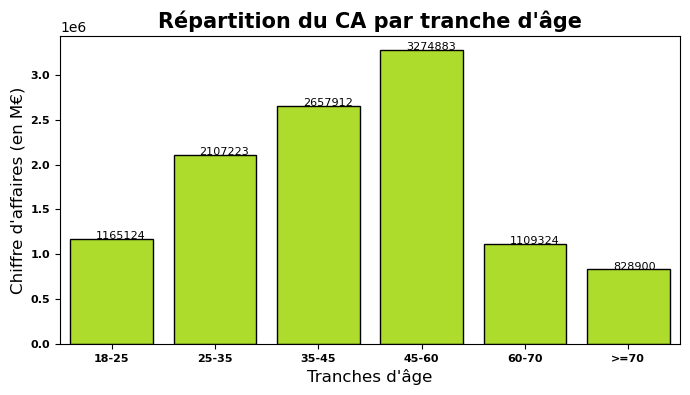

In [224]:
#Graphique : Histogramme montrant la répartition de la clientèle en CA par tranche d'âge

#largeur et hauteur
plt.figure(figsize=(8,4))

#Définition des barres pour le CA par client B2B
Graph_CA_par_tranche_age = sns.barplot(df_CA_par_tranche_age, y='CA', x='age_range', color="#BBF90F", edgecolor='black')

plt.title("Répartition du CA par tranche d'âge", fontsize=15,fontweight='bold')
plt.ylabel("Chiffre d'affaires (en M€)", fontsize=12)
plt.xlabel("Tranches d'âge", fontsize=12, multialignment='center')
plt.xticks(fontsize=8, fontweight='bold')
plt.yticks(fontsize=8, fontweight='bold')

# Commentaire : Affichage de la valeur au-dessus de chaque barre
Label_Graph_CA_par_tranche_age = df_CA_par_tranche_age['CA'].tolist()
for i in range (6) : 
    plt.text(i-0.15, Label_Graph_CA_par_tranche_age[i], round(Label_Graph_CA_par_tranche_age[i]), fontsize=8)

plt.show()

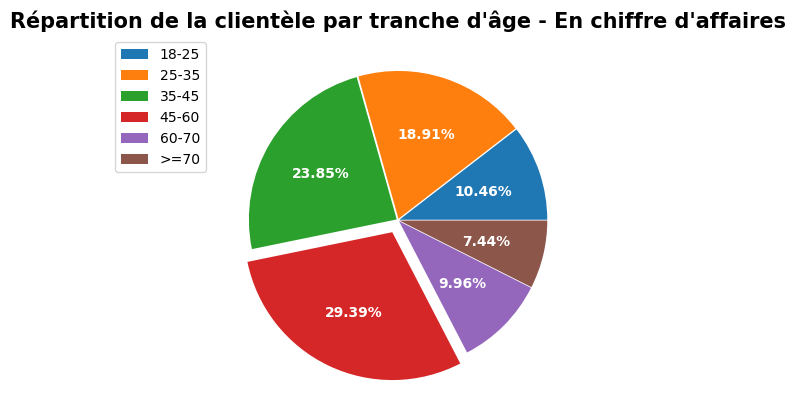

In [225]:
#Graphique en camembert : Répartition de la clientèle par tranche d'âge - En CA

#Définition du pie chart
df_CA_par_tranche_age.plot(kind='pie', y='CA', labels = df_CA_par_tranche_age['age_range'], legend=True, autopct='%.2f%%', textprops={'color':'white', 'fontweight':'bold'}, explode=[0.01, 0.01, 0.01, 0.09, 0.01, 0.01])

#Titre et légende
plt.title("Répartition de la clientèle par tranche d'âge - En chiffre d'affaires", fontsize=15, fontweight='bold')
plt.legend(bbox_to_anchor=(0,1))

#Suppression du nom de l'axe Y
plt.ylabel(None)

plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 6.4 - Répartition de la clientèle par genre</h3>
</div>

Rappel : nous avons exclut les 4 clients BtoB de la base de données. 

In [228]:
#Regroupement du nombre de clients par genre
df_nombre_clients_par_genre = df_transactions_products_customers_no_BtoB.groupby(['sex'])['client_id'].count().reset_index(name='Nombre de clients')
display(df_nombre_clients_par_genre.head())

sex  Nombre de clients
0   f             333494
1   m             307240

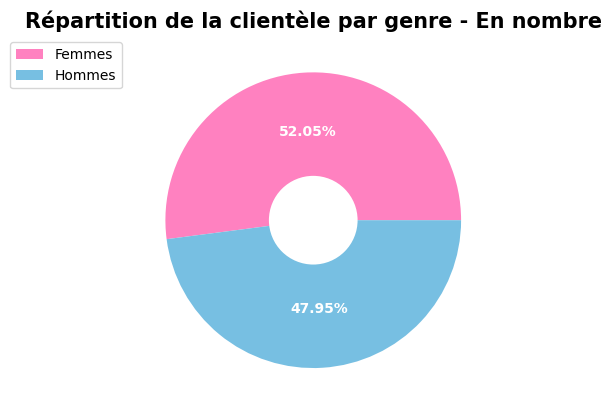

In [229]:
#Graphique en camembert : Répartition de la clientèle par genre - En nombre

#Renommer les valeurs de la variable "sex"
labels_gender = ['Femmes', 'Hommes']

#Définition du pie chart
df_nombre_clients_par_genre.plot(kind='pie', y='Nombre de clients', labels = labels_gender, legend=True, autopct='%.2f%%', textprops={'color':'white', 'fontweight':'bold'}, colors=["#FF81C0", "#77BFE2"])

#Suppression du nom de l'axe Y
plt.ylabel(None)

#Titre et légende
plt.title('Répartition de la clientèle par genre - En nombre', fontsize=15, fontweight='bold')
plt.legend(bbox_to_anchor=(0,1))

#Ajout d'un centre vide blanc pour un format de graphique camembert de type "donut pie"
centre_circle = plt.Circle((0, 0), 0.3, fc='white')
#Affichage du rond blanc au centre du graphique en camembert (gcf = get current figure)
fig = plt.gcf()
#Ajout du cercle blanc au centre du graphique en camembert principal. Fonction "add_artist" pour ajouter un nouvel objet à un graphique.
fig.gca().add_artist(centre_circle)

plt.show()

In [230]:
#Regroupement du CA par genre
df_CA_par_genre = df_transactions_products_customers_no_BtoB.groupby(['sex'])['price'].sum().reset_index(name='CA')
display(df_CA_par_genre.head())

sex          CA
0   f  5796925.08
1   m  5346441.93

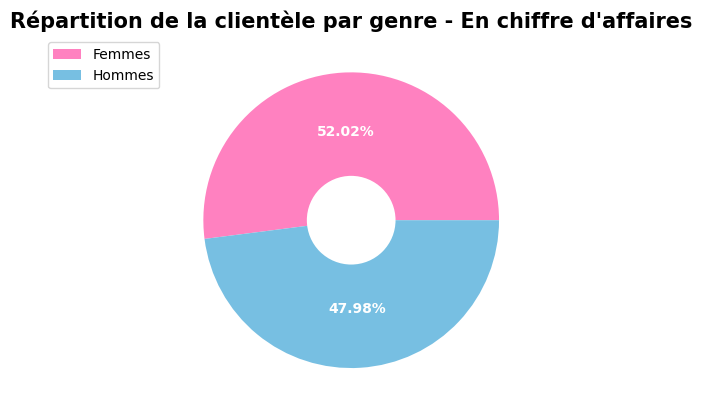

In [231]:
#Graphique en camembert : Répartition de la clientèle par genre - En CA

#Renommer les valeurs de la variable "sex"
labels_gender = ['Femmes', 'Hommes']

#Définition du pie chart
df_CA_par_genre.plot(kind='pie', y='CA', labels = labels_gender, legend=True, autopct='%.2f%%', textprops={'color':'white', 'fontweight':'bold'}, colors=["#FF81C0", "#77BFE2"])

#Suppression du nom de l'axe Y
plt.ylabel(None)

#Titre et légende
plt.title("Répartition de la clientèle par genre - En chiffre d'affaires", fontsize=15, fontweight='bold')
plt.legend(bbox_to_anchor=(0,1))

#Ajout d'un centre vide blanc pour un format de graphique camembert de type "donut pie"
centre_circle = plt.Circle((0, 0), 0.3, fc='white')
#Affichage du rond blanc au centre du graphique en camembert (gcf = get current figure)
fig = plt.gcf()
#Ajout du cercle blanc au centre du graphique en camembert principal. Fonction "add_artist" pour ajouter un nouvel objet à un graphique.
fig.gca().add_artist(centre_circle)

plt.show()

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 7 - Analyse des corrélations</h2>
</div>

Remarque :

Nous allons utiliser le dataframe hors clients BtoB identifiés précédemment, car la prise en compte de ces 4 clients professionnels risque de biaiser les résultats de nos tests (de par leur aspect significatif).

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 7.1. - Lien entre genre d'un client et les catégories de livres achetés</h3>
</div>

2 variables qualitatives : 
- Fréquence < 5 : Test de Fisher
- Fréquence >= 5 : Test de Chi-Carré

Ici on choisira le test de Chi-Carré car nous sommes en présence d'un échantillon >=5 fréquences :
- Genre (2 fréquences) : H ou F 
- Catégorie (3 fréquences) : Categ_0, Categ_1, Categ_2

Etapes : 
- Formulation des hypothèses
- Sélection des colonnes pertinentes
- Création du tableau de contingence
- Création de l'histogramme (barplot)
- Création de la heatmap
- Calcul du test du Chi-2 : Statistique Chi-2, Degré de liberté, Fréquences attendues
- Calcul valeur p

Formulation des hypothèses :

- H0 : La catégorie de livre acheté est indépendante du genre du client
- H1 : La catégorie de livre acheté dépend du genre du client

In [239]:
display(df_transactions_products_customers_no_BtoB.head())

id_prod                       date session_id client_id  price    categ sex  \
0  0_1259 2021-03-01 00:01:07.843138        s_1     c_329  11.99  Categ_0   f   
1  0_1390 2021-03-01 00:02:26.047414        s_2     c_664  19.37  Categ_0   m   
2  0_1352 2021-03-01 00:02:38.311413        s_3     c_580   4.50  Categ_0   m   
3  0_1458 2021-03-01 00:04:54.559692        s_4    c_7912   6.55  Categ_0   f   
4  0_1358 2021-03-01 00:05:18.801198        s_5    c_2033  16.49  Categ_0   f   

   birth mois-année  semaine        jour  age  
0   1967    2021-03  2021-09  2021-03-01   58  
1   1960    2021-03  2021-09  2021-03-01   65  
2   1988    2021-03  2021-09  2021-03-01   37  
3   1989    2021-03  2021-09  2021-03-01   36  
4   1956    2021-03  2021-09  2021-03-01   69

In [240]:
#Sélection des données pertinentes [genre, catégorie]

df_genre_categ = df_transactions_products_customers_no_BtoB.loc[:, ['sex', 'categ']]
display(df_genre_categ.head())

sex    categ
0   f  Categ_0
1   m  Categ_0
2   m  Categ_0
3   f  Categ_0
4   f  Categ_0

In [241]:
#Création nouveau dataframe [genre, catégorie, nombre produits]

df_genre_categ_produits = df_transactions_products_customers_no_BtoB.groupby(['sex', 'categ'])['id_prod'].count().reset_index(name='Nombre produits')
display(df_genre_categ_produits)

sex    categ  Nombre produits
0   f  Categ_0           200793
1   f  Categ_1           115721
2   f  Categ_2            16980
3   m  Categ_0           186488
4   m  Categ_1           104884
5   m  Categ_2            15868

In [242]:
#Création du tableau de contingence

from scipy.stats import chi2_contingency
contingency_table_genre_categ = pd.crosstab(df_genre_categ['sex'], df_genre_categ['categ'])
print(contingency_table_genre_categ)

categ  Categ_0  Categ_1  Categ_2
sex                             
f       200793   115721    16980
m       186488   104884    15868


([0, 1, 2],
 [Text(0, 0, 'Categ_0'), Text(1, 0, 'Categ_1'), Text(2, 0, 'Categ_2')])

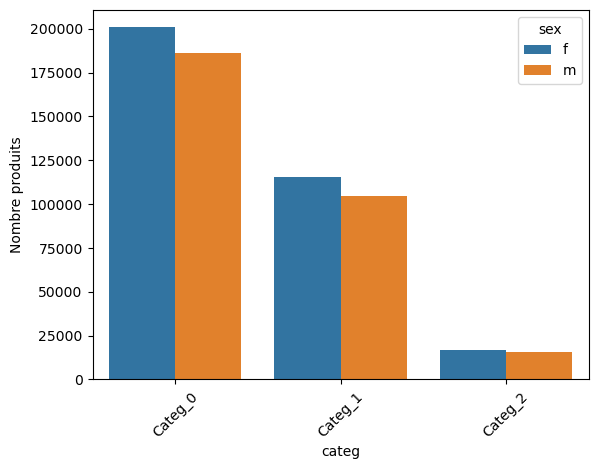

In [243]:
#Création de l'histogramme de contingence (barplot)

sns.barplot(data=df_genre_categ_produits, x='categ', y='Nombre produits', hue='sex', estimator='sum')
plt.xticks(rotation=45)

<Axes: xlabel='categ', ylabel='sex'>

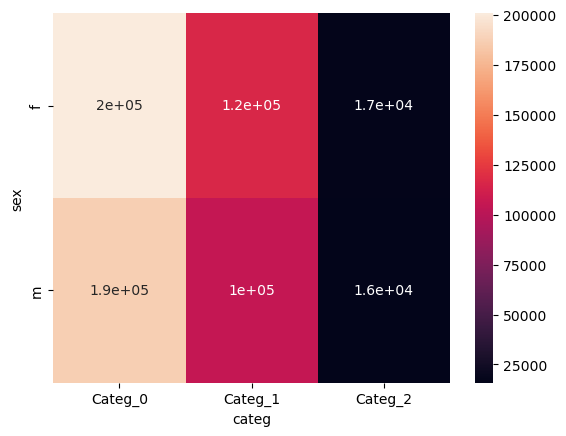

In [244]:
#Création de la heatmap de contingence
sns.heatmap(contingency_table_genre_categ, annot=True)

Au vu de la heatmap de contingence, à priori on peut supposer que le genre du client n'a pas d'influence sur la catégorie de livre acheté.

In [246]:
#Calcul du test du Chi-2 : Statistique Chi-2, Degré de liberté, Fréquences attendues, Calcul valeur p

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table_genre_categ)

print(f"Statistique Chi-2: {chi2_stat}")
print(f"Valeur p: {p_value}")
print(f"Degrés de liberté: {dof}")
print("Fréquences attendues:")
print(expected)

Statistique Chi-2: 22.66856665178056
Valeur p: 1.1955928116587024e-05
Degrés de liberté: 2
Fréquences attendues:
[[201574.89662481 114822.13191434  17096.97146086]
 [185706.10337519 105782.86808566  15751.02853914]]


Valeur p < 0.05 donc on rejette HO : la catégorie de livre acheté est donc dépendante du genre du client.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 7.2. - Lien entre l'âge des clients et le montant total des achats</h3>
</div>

2 variables quantitatives : 
- Test paramétrique : Test de Pearson
- Test non paramétrique : Test de Spearman

Pour pouvoir choisir le type de test à retenir, nous devons déterminer si le test est paramétrique (suit une loi normale) ou non. 

Pour cela nous allons utiliser le test de Shapiro-Wilk. En voici les hypothèses : 

- Si p < 0.05 : Données ne suivent pas une distribution normale
- Si p > 0.05 : Données suivent une distribution normale

In [251]:
display(df_transactions_products_customers_no_BtoB.head())

id_prod                       date session_id client_id  price    categ sex  \
0  0_1259 2021-03-01 00:01:07.843138        s_1     c_329  11.99  Categ_0   f   
1  0_1390 2021-03-01 00:02:26.047414        s_2     c_664  19.37  Categ_0   m   
2  0_1352 2021-03-01 00:02:38.311413        s_3     c_580   4.50  Categ_0   m   
3  0_1458 2021-03-01 00:04:54.559692        s_4    c_7912   6.55  Categ_0   f   
4  0_1358 2021-03-01 00:05:18.801198        s_5    c_2033  16.49  Categ_0   f   

   birth mois-année  semaine        jour  age  
0   1967    2021-03  2021-09  2021-03-01   58  
1   1960    2021-03  2021-09  2021-03-01   65  
2   1988    2021-03  2021-09  2021-03-01   37  
3   1989    2021-03  2021-09  2021-03-01   36  
4   1956    2021-03  2021-09  2021-03-01   69

In [252]:
#Test de Shapiro-Wilk (loi normale) : variable "price"

from scipy.stats import shapiro

# Extraire la colonne
test_price = df_transactions_products_customers_no_BtoB['price'].dropna()

# Effectuer le test de Shapiro-Wilk
stat, p_value = shapiro(test_price)

# Afficher les résultats
print("Taille de mon échantillon:", len(test_price))
print(f"Statistique du test de Shapiro-Wilk : {stat}")
print(f"Valeur p : {p_value}")

# Interprétation des résultats
alpha = 0.05
if p_value > alpha:
    print("Les données suivent une distribution normale (on ne rejette pas H0)")
else:
    print("Les données ne suivent pas une distribution normale (on rejette H0)")

Taille de mon échantillon: 640734
Statistique du test de Shapiro-Wilk : 0.5490930752783325
Valeur p : 4.561657369485144e-200
Les données ne suivent pas une distribution normale (on rejette H0)


C:\Users\Eliane CAMUS\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 640734.



Résultat = distribution non normale mais N>2000 donc test de Shapiro-Wilk pas fiable. 

Si on se base sur ces derniers résultats, on doit sélectionner le test de SPEARMAN.
De mon côté je vais effectuer le test à la fois avec PEARSON et SPEARMAN pour comparer. 

1. Test de SPEARMAN

Conditions : 
- Les données n’ont pas besoin de suivre une distribution normale
- La relation entre les 2 variables n'a pas besoin d'être linéaire.

Etapes : 
- Formulation des hypothèses
- Sélection des colonnes pertinentes
- Visualisation des tendances via un nuage de points (regplot)
- Calcul du coefficient de corrélation ρ (ρ=1 : corrélation positive parfaite / ρ=-1 : corrélation négative parfaite / ρ=0 : aucune corrélation)
- Calcul valeur p

Hypothèses :

- H0 : La catégorie de livre acheté est indépendante du genre du client (corrélation probablement dûe au hasard)
- 
H1 : La catégorie de livre acheté dépend du genre du client (corrélation statistiquement significative)


In [257]:
#Création du dataframe avec le CA par âge
df_CA_par_age = df_transactions_products_customers_no_BtoB.loc[:, ['age', 'price']].sort_values(by='age')
display(df_CA_par_age.reset_index(drop=True).head())

age  price
0   21  13.79
1   21  16.99
2   21  11.01
3   21  12.71
4   21  48.99

In [258]:
#Regroupement du montant total par âge
df_CA_par_age = df_CA_par_age.groupby(['age'])['price'].sum().to_frame().reset_index()
display(df_CA_par_age.head())

age      price
0   21  616418.15
1   22  180680.89
2   23  186791.83
3   24  181233.57
4   25  167388.08

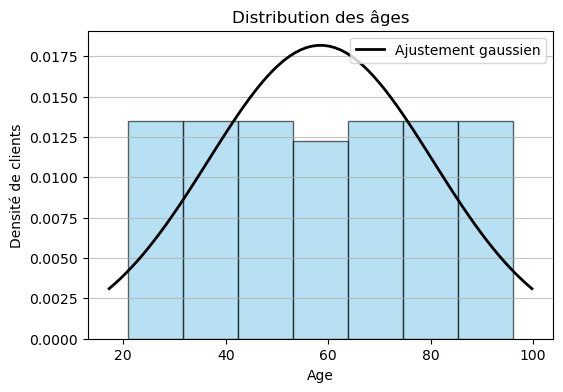

In [259]:
#Distribution des âges

from scipy.stats import norm

plt.figure(figsize=(6, 4))
plt.hist(df_CA_par_age['age'], bins=7, density=True, color='skyblue', edgecolor='black', alpha=0.6)

mu, std = norm.fit(df_CA_par_age['age'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, df_CA_par_age.shape[0])
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2, label="Ajustement gaussien")

plt.legend()

plt.title('Distribution des âges')
plt.xlabel('Age')
plt.ylabel('Densité de clients')
plt.grid(axis='y', alpha=0.75)

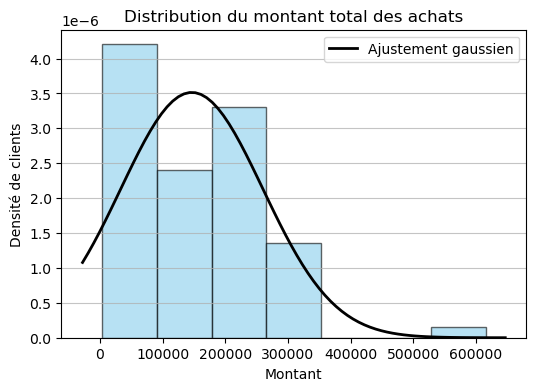

In [260]:
#Distribution des montants totaux des achats

from scipy.stats import norm

plt.figure(figsize=(6, 4))
plt.hist(df_CA_par_age['price'], bins=7, density=True, color='skyblue', edgecolor='black', alpha=0.6)

mu, std = norm.fit(df_CA_par_age['price'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, df_CA_par_age.shape[0])
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2, label="Ajustement gaussien")

plt.legend()

plt.title('Distribution du montant total des achats')
plt.xlabel('Montant')
plt.ylabel('Densité de clients')
plt.grid(axis='y', alpha=0.75)

<Axes: xlabel='age', ylabel='price'>

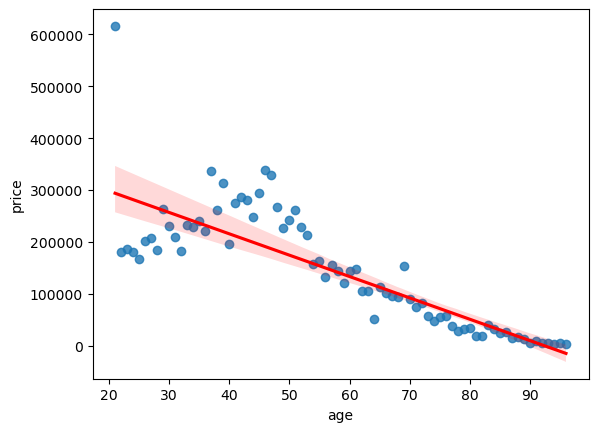

In [261]:
# Visualisation de la tendance
from scipy.stats import spearmanr
sns.regplot(data=df_CA_par_age, x='age', y='price', robust=True, line_kws=dict(color="r"))

In [262]:
#Calculer le coefficient de corrélation de Spearman et la valeur p

spearman_corr, spearman_p_value = spearmanr(df_CA_par_age['age'], df_CA_par_age['price'])
print(f"Coefficient de corrélation de Spearman: {spearman_corr}")
print(f"Valeur p: {spearman_p_value}")

Coefficient de corrélation de Spearman: -0.8744497607655503
Valeur p: 5.956077505475151e-25


Résultats : 
- Coefficient de corrélation de Spearman (ρ<1) : Forte corrélation négative entre l'âge et le montant des achats
- Valeur p < 0.05 : On rejette H0, Corrélation statistiquement significative (la relation observée ne peut donc pas être due au hasard), il y a donc une corrélation entre l'âge et le montant des achats.
- Conclusion : Plus le client est vieux, moins le montant de ses achats est important. A l'inverse, plus le client est jeune, plus le montant des achats est élevé. 


2. Test de PEARSON

Conditions : 
- Les données suivent une distribution normale
- La relation entre les 2 variables est linéaire.

Hypothèses :

- H0 : La catégorie de livre acheté est indépendante du genre du clien (corrélation probablement dûe au hasard)
- 
H1 : La catégorie de livre acheté dépend du genre du client (corrélation statistiquement significative)


<Axes: xlabel='age', ylabel='price'>

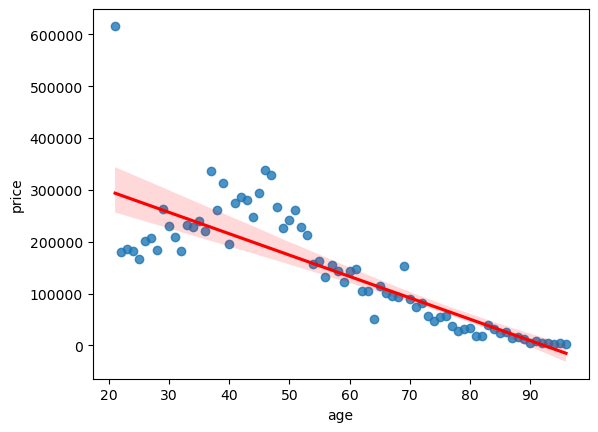

In [266]:
# Visualisation de la tendance
from scipy.stats import pearsonr
sns.regplot(data=df_CA_par_age, x='age', y='price', robust=True, line_kws=dict(color="r"))

In [267]:
#Calculer le coefficient de corrélation de Pearson et la valeur p

correlation, p_value = pearsonr(df_CA_par_age['age'], df_CA_par_age['price'])
print(f"Coefficient de corrélation de Pearson: {correlation}")
print(f"Valeur p: {p_value}")

Coefficient de corrélation de Pearson: -0.8306339322016811
Valeur p: 1.685574847013544e-20


Résultats : 
- Coefficient de corrélation de Pearson (ρ<1) : Forte corrélation négative entre l'âge et le montant des achats
- Valeur p < 0.05 : On rejette H0, Corrélation statistiquement significative (la relation observée ne peut donc pas être due au hasard), il y a donc une corrélation entre l'âge et le montant des achats. 
- Conclusion : On retombe sur les mêmes résultats qu'avec le test de Spearman => Plus le client est vieux, moins le montant de ses achats est important. A l'inverse, plus le client est jeune, plus le montant des achats est élevé.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 7.3. - Lien entre l'âge des clients et la fréquence d'achat</h3>
</div>

2 variables quantitatives : 
- Test paramétrique : Test de Pearson
- Test non paramétrique : Test de Spearman

Pour pouvoir choisir le type de test à retenir, nous devons déterminer si le test est paramétrique (suit une loi normale) ou non. 

Pour cela nous allons utiliser le test de Shapiro-Wilk : 
- Si p < 0.05 : Données ne suivent pas une distribution normale
- Si p > 0.05 : Données suivent une distribution normale

In [272]:
display(df_transactions_products_customers.head())

id_prod                       date session_id client_id  price    categ sex  \
0  0_1259 2021-03-01 00:01:07.843138        s_1     c_329  11.99  Categ_0   f   
1  0_1390 2021-03-01 00:02:26.047414        s_2     c_664  19.37  Categ_0   m   
2  0_1352 2021-03-01 00:02:38.311413        s_3     c_580   4.50  Categ_0   m   
3  0_1458 2021-03-01 00:04:54.559692        s_4    c_7912   6.55  Categ_0   f   
4  0_1358 2021-03-01 00:05:18.801198        s_5    c_2033  16.49  Categ_0   f   

   birth mois-année  semaine        jour  
0   1967    2021-03  2021-09  2021-03-01  
1   1960    2021-03  2021-09  2021-03-01  
2   1988    2021-03  2021-09  2021-03-01  
3   1989    2021-03  2021-09  2021-03-01  
4   1956    2021-03  2021-09  2021-03-01

In [273]:
#Création du dataframe avec la fréquence d'achat par âge : on veut le nombre de produits achetés par chaque client puis regroupé par âge
df_frequence_achat_par_age = df_transactions_products_customers_no_BtoB.loc[:, ['age', 'id_prod']].sort_values(by='age')
display(df_frequence_achat_par_age.reset_index(drop=True).head())

age id_prod
0   21   1_504
1   21   1_677
2   21  0_1514
3   21  0_1586
4   21    2_37

In [274]:
df_frequence_achat_par_age = df_frequence_achat_par_age.groupby(['age'])['id_prod'].count().to_frame().reset_index()
display(df_frequence_achat_par_age.head())

age  id_prod
0   21    15497
1   22     4491
2   23     4711
3   24     4378
4   25     4529

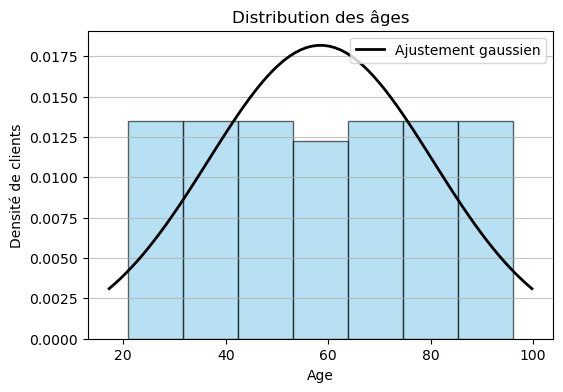

In [275]:
#Distribution des âges

from scipy.stats import norm

plt.figure(figsize=(6, 4))
plt.hist(df_frequence_achat_par_age['age'], bins=7, density=True, color='skyblue', edgecolor='black', alpha=0.6)

mu, std = norm.fit(df_frequence_achat_par_age['age'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, df_frequence_achat_par_age.shape[0])
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2, label="Ajustement gaussien")

plt.legend()

plt.title('Distribution des âges')
plt.xlabel('Age')
plt.ylabel('Densité de clients')
plt.grid(axis='y', alpha=0.75)

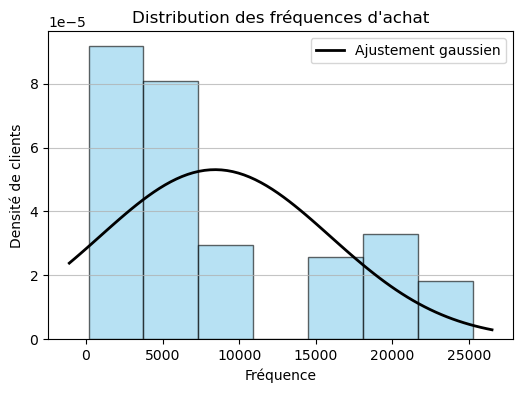

In [276]:
#Distribution des fréquences d'achat

from scipy.stats import norm

plt.figure(figsize=(6, 4))
plt.hist(df_frequence_achat_par_age['id_prod'], bins=7, density=True, color='skyblue', edgecolor='black', alpha=0.6)

mu, std = norm.fit(df_frequence_achat_par_age['id_prod'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, df_frequence_achat_par_age.shape[0])
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2, label="Ajustement gaussien")

plt.legend()

plt.title("Distribution des fréquences d'achat")
plt.xlabel('Fréquence')
plt.ylabel('Densité de clients')
plt.grid(axis='y', alpha=0.75)

In [277]:
#Test de Shapiro-Wilk (loi normale) : variable de fréquence d'achat

from scipy.stats import shapiro

# Extraire la colonne 
test_frequence = df_frequence_achat_par_age['id_prod'].dropna()

# Effectuer le test de Shapiro-Wilk
stat, p_value = shapiro(test_frequence)

# Afficher les résultats
print("Taille de mon échantillon:", len(test_frequence))
print(f"Statistique du test de Shapiro-Wilk : {stat}")
print(f"Valeur p : {p_value}")

# Interprétation des résultats
alpha = 0.05
if p_value > alpha:
    print("Les données suivent une distribution normale (on ne rejette pas H0)")
else:
    print("Les données ne suivent pas une distribution normale (on rejette H0)")

Taille de mon échantillon: 76
Statistique du test de Shapiro-Wilk : 0.858964800425687
Valeur p : 5.637937968603026e-07
Les données ne suivent pas une distribution normale (on rejette H0)


Résultat = distribution non normale mais N>2000 donc test de Shapiro-Wilk pas fiable.

Si on se base sur ces derniers résultats, on doit sélectionner le test de SPEARMAN.
De mon côté je vais effectuer le test à la fois avec PEARSON et SPEARMAN pour comparer. 

1. TEST DE PEARSON 

Conditions : 
- suit une loi normale
- corrélation linéaire

Hypothèses :

- H0 : La fréquence d'achat est indépendante de l'âge du client (corrélation probablement dûe au hasard)
- 
H1 : La fréquence d'achat dépend de l'âge du client (corrélation statistiquement significative)



<Axes: xlabel='age', ylabel='id_prod'>

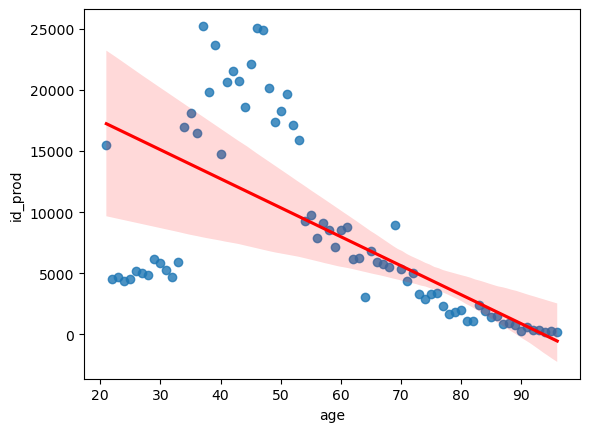

In [281]:
# Visualisation de la tendance : Pearson
from scipy.stats import pearsonr
sns.regplot(data=df_frequence_achat_par_age, x='age', y='id_prod', robust=True, line_kws=dict(color="r"))

In [282]:
#Calculer le coefficient de corrélation de Pearson et la valeur p

correlation, p_value = pearsonr(df_frequence_achat_par_age['age'], df_frequence_achat_par_age['id_prod'])
print(f"Coefficient de corrélation de Pearson: {correlation}")
print(f"Valeur p: {p_value}")

Coefficient de corrélation de Pearson: -0.5774625517171508
Valeur p: 4.732169314077601e-08


Résultats : 
- Coefficient de corrélation de Spearman (ρ<1) : Forte moyenne négative entre l'âge et la fréquence des achats
- Valeur p < 0.05 : On rejette H0, Corrélation statistiquement significative (la relation observée ne peut donc pas être due au hasard), il y a donc une corrélation entre l'âge et la fréquence des achats.
- Conclusion : Plus le client est vieux, moins il a tendance à acheter de livres. A l'inverse, plus le client est jeune, plus il sera susceptible d'acheter de livres.

2. TEST DE SPEARMAN

Conditions : 
- ne suit pas de loi normale
- corrélation non linéaire

Hypothèses :

- H0 : La fréquence d'achat est indépendante de l'âge du client (corrélation probablement dûe au hasard)
- 
H1 : La fréquence d'achat dépend de l'âge du client (corrélation statistiquement significative)



<Axes: xlabel='age', ylabel='id_prod'>

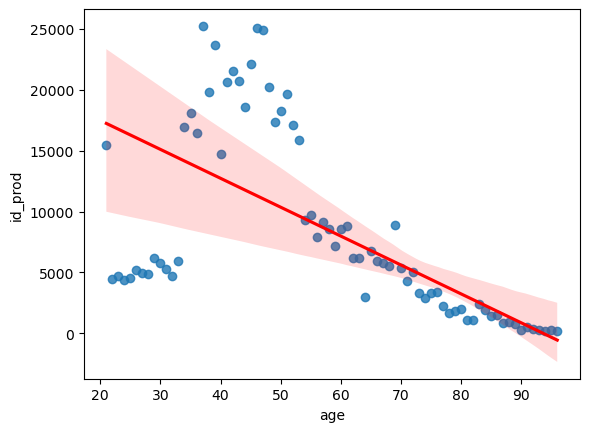

In [286]:
# Visualisation de la tendance : Spearman
from scipy.stats import spearmanr
sns.regplot(data=df_frequence_achat_par_age, x='age', y='id_prod', robust=True, line_kws=dict(color="r"))

In [287]:
#Calculer le coefficient de corrélation de Spearman et la valeur p

spearman_corr, spearman_p_value = spearmanr(df_frequence_achat_par_age['age'], df_frequence_achat_par_age['id_prod'])
print(f"Coefficient de corrélation de Spearman: {spearman_corr}")
print(f"Valeur p: {spearman_p_value}")

Coefficient de corrélation de Spearman: -0.6756527682843472
Valeur p: 2.146632000345534e-11


Résultats : 
- Coefficient de corrélation de Spearman (ρ<1) : Forte moyenne négative entre l'âge et le montant des achats
- Valeur p < 0.05 : On rejette H0, Corrélation statistiquement significative (la relation observée ne peut donc pas être due au hasard), il y a donc une corrélation entre l'âge et le montant des achats. 
- Conclusion : Plus le client est vieux, moins il a tendance à acheter de livres. A l'inverse, plus le client est jeune, plus il sera susceptible d'acheter de livres.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 7.4. - Lien entre l'âge des clients et la taille du panier moyen</h3>
</div>

Dans cette rubrique, on va à la fois tester : 
- La taille du panier moyen (nombre d'articles moyen par panier)
- Le montant du panier moyen (montant moyen par panier)

TAILLE DU PANIER MOYEN :

2 variables quantitatives : 
- Test paramétrique : Test de Pearson
- Test non paramétrique : Test de Spearman

Pour pouvoir choisir le type de test à retenir, nous devons déterminer si le test est paramétrique (suit une loi normale) ou non. 

Pour cela nous allons utiliser le test de Shapiro-Wilk : 
- Si p < 0.05 : Données ne suivent pas une distribution normale
- Si p > 0.05 : Données suivent une distribution normale

In [294]:
#Calcul du nombre total d'articles par panier pour chaque client
df_taille_panier_par_session_par_client = df_transactions_products_customers_no_BtoB.groupby(['client_id', 'session_id', 'age'])['id_prod'].count().reset_index(name='panier')
display(df_taille_panier_par_session_par_client.head())

client_id session_id  age  panier
0       c_1   s_101417   70       1
1       c_1   s_105105   70       4
2       c_1   s_114737   70       5
3       c_1   s_120172   70       2
4       c_1   s_134971   70       1

In [295]:
#Calcul de la taille du panier moyen par client
df_taille_panier_moyen_par_client = df_taille_panier_par_session_par_client.groupby(['client_id', 'age'])['panier'].sum().reset_index(name='panier_moyen')
display(df_taille_panier_moyen_par_client.head())

client_id  age  panier_moyen
0       c_1   70            43
1      c_10   69            58
2     c_100   33             8
3    c_1000   59           126
4    c_1001   43           103

In [296]:
#Suppression de la colonne "client_id"
df_taille_panier_moyen_par_client.drop('client_id', axis=1).head()

age  panier_moyen
0   70            43
1   69            58
2   33             8
3   59           126
4   43           103

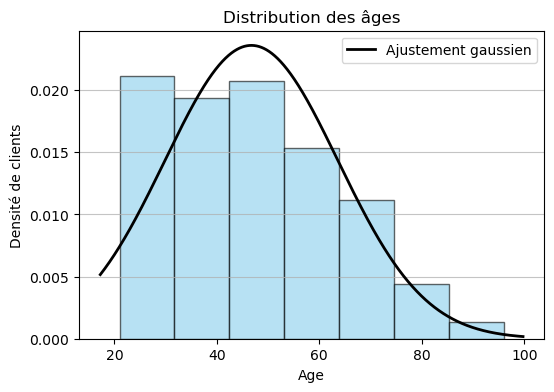

In [297]:
#Distribution des âges

from scipy.stats import norm

plt.figure(figsize=(6, 4))
plt.hist(df_taille_panier_moyen_par_client['age'], bins=7, density=True, color='skyblue', edgecolor='black', alpha=0.6)

mu, std = norm.fit(df_taille_panier_moyen_par_client['age'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, df_taille_panier_moyen_par_client.shape[0])
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2, label="Ajustement gaussien")

plt.legend()

plt.title('Distribution des âges')
plt.xlabel('Age')
plt.ylabel('Densité de clients')
plt.grid(axis='y', alpha=0.75)

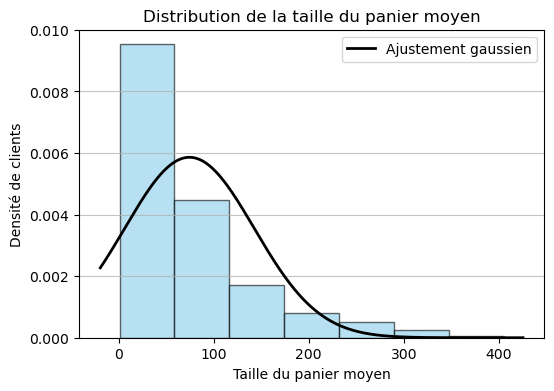

In [298]:
#Distribution de la taille du panier moyen

from scipy.stats import norm

plt.figure(figsize=(6, 4))
plt.hist(df_taille_panier_moyen_par_client['panier_moyen'], bins=7, density=True, color='skyblue', edgecolor='black', alpha=0.6)

mu, std = norm.fit(df_taille_panier_moyen_par_client['panier_moyen'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, df_taille_panier_moyen_par_client.shape[0])
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2, label="Ajustement gaussien")

plt.legend()

plt.title('Distribution de la taille du panier moyen')
plt.xlabel('Taille du panier moyen')
plt.ylabel('Densité de clients')
plt.grid(axis='y', alpha=0.75)

In [299]:
#Test de Shapiro-Wilk (loi normale) : taille du panier moyen

from scipy.stats import shapiro

# Extraire la colonne 
test_taille_panier_moyen = df_taille_panier_moyen_par_client['panier_moyen'].dropna()

# Effectuer le test de Shapiro-Wilk
stat, p_value = shapiro(test_taille_panier_moyen)

# Afficher les résultats
print("Taille de mon échantillon:", len(test_taille_panier_moyen))
print(f"Statistique du test de Shapiro-Wilk : {stat}")
print(f"Valeur p : {p_value}")

# Interprétation des résultats
alpha = 0.05
if p_value > alpha:
    print("Les données suivent une distribution normale (on ne rejette pas H0)")
else:
    print("Les données ne suivent pas une distribution normale (on rejette H0)")

Taille de mon échantillon: 8596
Statistique du test de Shapiro-Wilk : 0.8156832889748893
Valeur p : 1.7994122837166456e-71
Les données ne suivent pas une distribution normale (on rejette H0)


C:\Users\Eliane CAMUS\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8596.



Résultat = distribution non normale mais N>2000 donc test de Shapiro-Wilk pas fiable.

Si on se base sur ces derniers résultats, on doit sélectionner le test de SPEARMAN.
De mon côté je vais effectuer le test à la fois avec PEARSON et SPEARMAN pour comparer. 

1. TEST DE PEARSON

Conditions : 
- suit une loi normale
- corrélation linéaire

Hypothèses :

- H0 : La taille du panier moyen est indépendant de l'âge du client (corrélation probablement dûe au hasard)
- H1 : La taille du panier moyen dépend de l'âge du client (corrélation statistiquement significative)

<Axes: xlabel='age', ylabel='panier_moyen'>

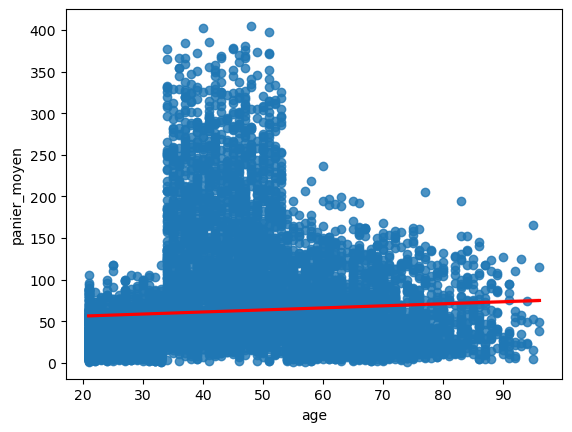

In [303]:
# Visualisation de la tendance : Pearson
from scipy.stats import pearsonr
sns.regplot(data=df_taille_panier_moyen_par_client, x='age', y='panier_moyen', robust=True, line_kws=dict(color="r"))

In [304]:
#Calculer le coefficient de corrélation de Pearson et la valeur p

correlation, p_value = pearsonr(df_taille_panier_moyen_par_client['age'], df_taille_panier_moyen_par_client['panier_moyen'])
print(f"Coefficient de corrélation de Pearson: {correlation}")
print(f"Valeur p: {p_value}")

Coefficient de corrélation de Pearson: 0.030327901870329868
Valeur p: 0.004922261715831482


Résultats :

- Coefficient de corrélation de Spearman (ρ proche de 0) : Presque aucune corrélation entre l'âge et la taille du panier moyen.
- Valeur p < 0.05 : On rejette H0, Corrélation statistiquement significative (la relation observée ne peut donc pas être due au hasard).
- Conclusion : Il une dépendance entre l'âge et la taille du panier moyen.

TEST DE SPEARMAN:

Conditions : 
- ne suit pas de loi normale
- corrélation non linéaire

Hypothèses : 
- H0 : La taille du panier moyen est indépendant de l'âge du client (corrélation probablement dûe au hasard)
- H1 : La taille du panier moyen dépend de l'âge du client (corrélation statistiquement significative)

<Axes: xlabel='age', ylabel='panier_moyen'>

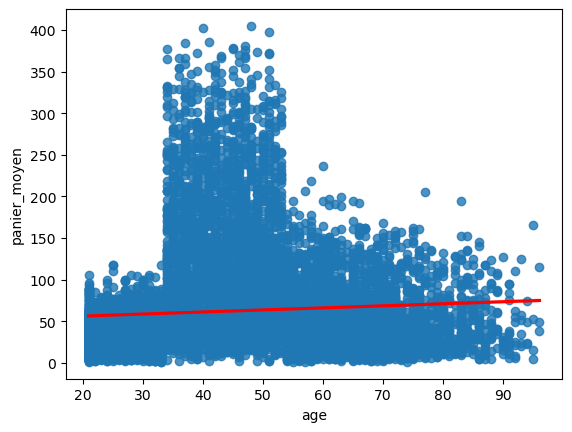

In [308]:
# Visualisation de la tendance : Spearman
from scipy.stats import spearmanr
sns.regplot(data=df_taille_panier_moyen_par_client, x='age', y='panier_moyen', robust=True, line_kws=dict(color="r"))

In [309]:
#Calculer le coefficient de corrélation de Spearman et la valeur p

spearman_corr, spearman_p_value = spearmanr(df_taille_panier_moyen_par_client['age'], df_taille_panier_moyen_par_client['panier_moyen'])
print(f"Coefficient de corrélation de Spearman: {spearman_corr}")
print(f"Valeur p: {spearman_p_value}")

Coefficient de corrélation de Spearman: 0.12766191018445167
Valeur p: 1.4497470156818763e-32


Résultats :

- Coefficient de corrélation de Spearman (ρ proche de 0) : Presque aucune corrélation entre l'âge et la taille du panier moyen.
- Valeur p < 0.05 : On rejette H0, Corrélation statistiquement significative (la relation observée ne peut donc pas être due au hasard).
- Conclusion : Il y a une dépendance entre l'âge et la taille du panier moyen.

MONTANT DU PANIER MOYEN :

2 variables quantitatives : 
- Test paramétrique : Test de Pearson
- Test non paramétrique : Test de Spearman

Pour pouvoir choisir le type de test à retenir, nous devons déterminer si le test est paramétrique (suit une loi normale) ou non. 

Pour cela nous allons utiliser le test de Shapiro-Wilk : 
- Si p < 0.05 : Données ne suivent pas une distribution normale
- Si p > 0.05 : Données suivent une distribution normale

In [314]:
#Calcul du montant total par panier pour chaque client
df_panier_par_session_par_client = df_transactions_products_customers_no_BtoB.groupby(['client_id', 'session_id', 'age'])['price'].sum().reset_index(name='panier')
display(df_panier_par_session_par_client.head())

client_id session_id  age  panier
0       c_1   s_101417   70   15.87
1       c_1   s_105105   70   62.96
2       c_1   s_114737   70   92.62
3       c_1   s_120172   70   44.29
4       c_1   s_134971   70   10.30

In [315]:
#Calcul du montant du panier moyen par client
df_panier_moyen_par_client = df_panier_par_session_par_client.groupby(['client_id', 'age'])['panier'].sum().reset_index(name='panier_moyen')
display(df_panier_moyen_par_client.head())

client_id  age  panier_moyen
0       c_1   70        629.02
1      c_10   69       1353.60
2     c_100   33        254.85
3    c_1000   59       2291.88
4    c_1001   43       1823.85

In [316]:
#Suppression de la colonne "client_id"
df_panier_moyen_par_client.drop('client_id', axis=1).head()

age  panier_moyen
0   70        629.02
1   69       1353.60
2   33        254.85
3   59       2291.88
4   43       1823.85

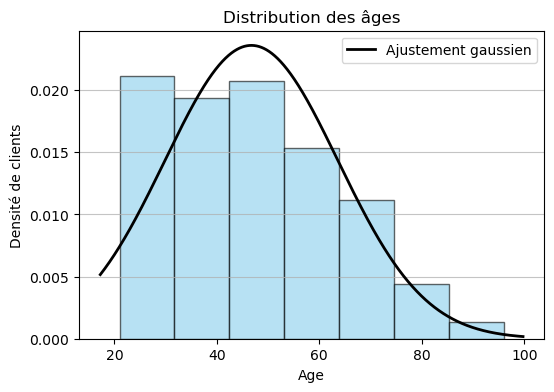

In [317]:
#Distribution des âges

from scipy.stats import norm

plt.figure(figsize=(6, 4))
plt.hist(df_panier_moyen_par_client['age'], bins=7, density=True, color='skyblue', edgecolor='black', alpha=0.6)

mu, std = norm.fit(df_panier_moyen_par_client['age'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, df_panier_moyen_par_client.shape[0])
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2, label="Ajustement gaussien")

plt.legend()

plt.title('Distribution des âges')
plt.xlabel('Age')
plt.ylabel('Densité de clients')
plt.grid(axis='y', alpha=0.75)

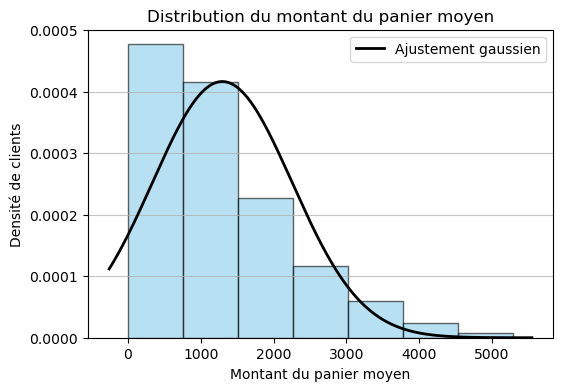

In [318]:
#Distribution du montant du panier moyen

from scipy.stats import norm

plt.figure(figsize=(6, 4))
plt.hist(df_panier_moyen_par_client['panier_moyen'], bins=7, density=True, color='skyblue', edgecolor='black', alpha=0.6)

mu, std = norm.fit(df_panier_moyen_par_client['panier_moyen'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, df_panier_moyen_par_client.shape[0])
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2, label="Ajustement gaussien")

plt.legend()

plt.title('Distribution du montant du panier moyen')
plt.xlabel('Montant du panier moyen')
plt.ylabel('Densité de clients')
plt.grid(axis='y', alpha=0.75)

In [319]:
#Test de Shapiro-Wilk (loi normale) : montant du panier moyen

from scipy.stats import shapiro

# Extraire la colonne 
test_panier_moyen = df_panier_moyen_par_client['panier_moyen'].dropna()

# Effectuer le test de Shapiro-Wilk
stat, p_value = shapiro(test_panier_moyen)

# Afficher les résultats
print("Taille de mon échantillon:", len(test_panier_moyen))
print(f"Statistique du test de Shapiro-Wilk : {stat}")
print(f"Valeur p : {p_value}")

# Interprétation des résultats
alpha = 0.05
if p_value > alpha:
    print("Les données suivent une distribution normale (on ne rejette pas H0)")
else:
    print("Les données ne suivent pas une distribution normale (on rejette H0)")

Taille de mon échantillon: 8596
Statistique du test de Shapiro-Wilk : 0.9042872733458418
Valeur p : 1.4824486626352822e-58
Les données ne suivent pas une distribution normale (on rejette H0)


C:\Users\Eliane CAMUS\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8596.



Résultat = distribution non normale mais N>2000 donc test de Shapiro-Wilk pas fiable.

Si on se base sur ces derniers résultats, on doit sélectionner le test de SPEARMAN.
De mon côté je vais effectuer le test à la fois avec PEARSON et SPEARMAN pour comparer. 

1. TEST DE PEARSON

Conditions : 
- suit une loi normale
- corrélation linéaire

Hypothèses :

- H0 : Le montant du panier moyen est indépendant de l'âge du client (corrélation probablement dûe au hasard)
- 
H1 : Le montant du panier moyen dépend de l'âge du client (corrélation statistiquement significative)



<Axes: xlabel='age', ylabel='panier_moyen'>

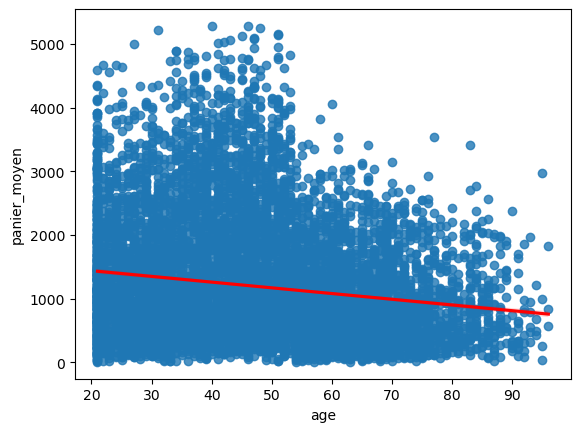

In [323]:
# Visualisation de la tendance : Pearson
from scipy.stats import pearsonr
sns.regplot(data=df_panier_moyen_par_client, x='age', y='panier_moyen', robust=True, line_kws=dict(color="r"))

In [324]:
#Calculer le coefficient de corrélation de Pearson et la valeur p

correlation, p_value = pearsonr(df_panier_moyen_par_client['age'], df_panier_moyen_par_client['panier_moyen'])
print(f"Coefficient de corrélation de Pearson: {correlation}")
print(f"Valeur p: {p_value}")

Coefficient de corrélation de Pearson: -0.18756654332685188
Valeur p: 6.663511559771716e-69


Résultats : 
- Coefficient de corrélation de Spearman (ρ proche de 0) : Presque aucune corrélation entre l'âge et le montant du panier moyen.
- Valeur p < 0.05 : On rejette H0, Corrélation statistiquement significative (la relation observée ne peut donc pas être due au hasard).
- Conclusion : Il y a une dépendance entre l'âge et le montant du panier moyen. 

2. TEST DE SPEARMAN

Conditions : 
- ne suit pas de loi normale
- corrélation non linéaire

Hypothèses :

- H0 : Le montant du panier moyen est indépendant de l'âge du client (corrélation probablement dûe au hasard)
- 
H1 : Le montant du panier moyen dépend de l'âge du client (corrélation statistiquement significative)



<Axes: xlabel='age', ylabel='panier_moyen'>

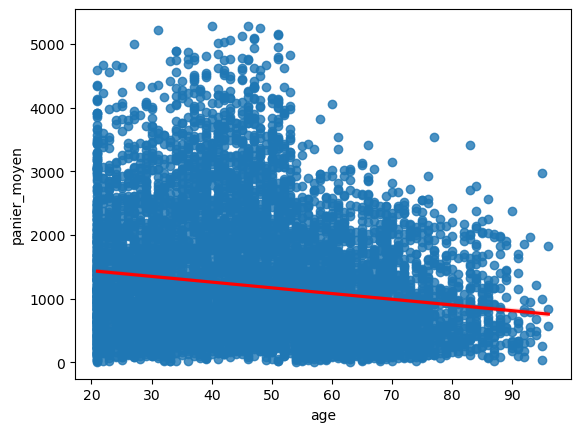

In [328]:
# Visualisation de la tendance : Spearman
from scipy.stats import spearmanr
sns.regplot(data=df_panier_moyen_par_client, x='age', y='panier_moyen', robust=True, line_kws=dict(color="r"))

In [329]:
#Calculer le coefficient de corrélation de Spearman et la valeur p

spearman_corr, spearman_p_value = spearmanr(df_panier_moyen_par_client['age'], df_panier_moyen_par_client['panier_moyen'])
print(f"Coefficient de corrélation de Spearman: {spearman_corr}")
print(f"Valeur p: {spearman_p_value}")

Coefficient de corrélation de Spearman: -0.18453803305845656
Valeur p: 1.0213160752893924e-66


Résultats : 
- Coefficient de corrélation de Spearman (ρ proche de 0) : Presque aucune corrélation entre l'âge et le montant du panier moyen.
- Valeur p < 0.05 : On rejette H0, Corrélation statistiquement significative (la relation observée ne peut donc pas être due au hasard).
- Conclusion : Il y a une dépendance entre l'âge et le montant du panier moyen. 

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 7.5. - Lien entre l'âge des clients et la catégorie des livres achetés</h3>
</div>

2 variables mixtes : 
- Test paramétrique : Test T (2 groupes à comparer) ou Test ANOVA (>=3 groupes à comparer)
- Test non paramétrique : Test de Mann-Whitney ou Test de Kruskall-Wallis

Ici nous avons >=3 groupes à comparer (plusieurs âges de 18 à 94 ans et 3 catégories de livres).

Nous sommes donc soit sur : 
- un Test ANOVA (si test paramétrique)
- un Test de Kruskall-Wallis (si test non paramétrique)

In [334]:
#Création dataframe [age, categ]

df_age_categ = df_transactions_products_customers_no_BtoB.loc[:, ['age', 'categ']]
display(df_age_categ.head())

age    categ
0   58  Categ_0
1   65  Categ_0
2   37  Categ_0
3   36  Categ_0
4   69  Categ_0

<Axes: xlabel='age', ylabel='categ'>

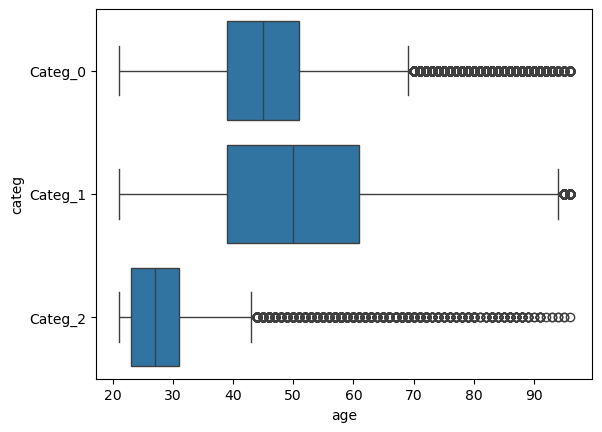

In [335]:
#Boxplot

from scipy.stats import f_oneway
sns.boxplot(x='age', y='categ', data=df_age_categ)

Remarques : 
- Catégorie 2 : achetée uniquement par les < 30 ans
- Catégorie 1 : achetée par les < 65 ans
- Catégorie 0 : achetée par les < 55 ans
- Au vu des boxplot, il est très probable que l'âge puisse influer sur la catégorie de livres acheté vu la différence d'âge des clients sur chacune des 3 catégories de livres.

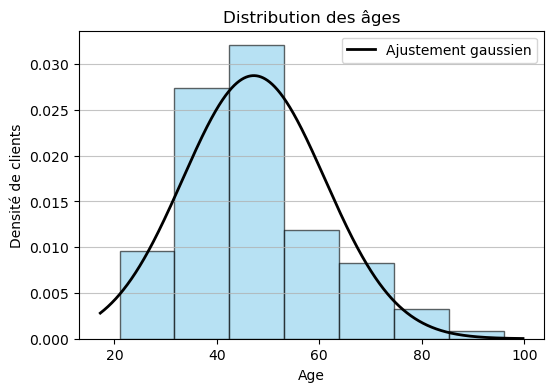

In [337]:
#Distribution des âges

from scipy.stats import norm

plt.figure(figsize=(6, 4))
plt.hist(df_age_categ['age'], bins=7, density=True, color='skyblue', edgecolor='black', alpha=0.6)

mu, std = norm.fit(df_age_categ['age'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, df_age_categ.shape[0])
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2, label="Ajustement gaussien")

plt.legend()

plt.title('Distribution des âges')
plt.xlabel('Age')
plt.ylabel('Densité de clients')
plt.grid(axis='y', alpha=0.75)

In [338]:
# Calcul moyenne & écart-type
mean_age = df_age_categ['age'].mean()
var_age = df_age_categ['age'].var()
std_age = df_age_categ['age'].std()

print(f"Moyenne des âges : {round(mean_age, 0)}")
print(f"Variance des âges : {round(var_age, 0)}")
print(f"Écart type des âges : {round(std_age, 0)}")

Moyenne des âges : 47.0
Variance des âges : 193.0
Écart type des âges : 14.0


Au vu de la courbe asymétrique, la distribution des âges n'a pas l'air de suivre une loi normale. 

In [340]:
#Test d'égalité des variances : Test de LEVENE

!pip install pingouin 
import pingouin as pg

pg.homoscedasticity(df_age_categ, dv='age', group='categ')

W  pval  equal_var
levene  24651.780367   0.0      False

On constate que valeur p < 0.05 donc on part du principe qu'il y a une différence entre les variances dans la population.

On utilisera pas le test ANOVA car les conditions suivantes ne sont pas rencontrées :
- Variances des groupes égales
- Les groupes suivent une distribution normale
- Données indépendantes
- Groupes >=3

In [343]:
# Sélectionner les colonnes pertinentes pour chaque type de voyage

Categ_0 = df_age_categ[df_age_categ['categ'] == 'Categ_0']['age'].dropna()
Categ_1 = df_age_categ[df_age_categ['categ'] == 'Categ_1']['age'].dropna()
Categ_2 = df_age_categ[df_age_categ['categ'] == 'Categ_2']['age'].dropna()

Test de KRUSKALL - WALLIS : 

Conditions :
- Les groupes ne suivent pas une distribution normale
- Données indépendantes
- Groupes >=3

Hypothèses :
- H0 : Pas de différence entre les moyennes des âges qu'importe la catégorie de livre acheté
- H1 : Différence significative entre les moyennes des âges en fonction de la catégorie de livre acheté

In [346]:
#Test de Kruskall Wallis avec les paramètres suivants :
        #dv = variable numérique dépendante
        #between = le facteur qualitatif
pg.kruskal(data=df_age_categ, dv='age', between='categ', detailed=False)

Source  ddof1             H  p-unc
Kruskal  categ      2  71359.734121    0.0

Résultats : 

- Statistique de test H : Compare la variation entre les groupes à la variation au sein de chaque groupe. Une valeur H aussi élevée démontre une grande différence entre les médianes des âges.

- Valeur p < 0.05 : On rejette H0, donc la moyenne des groupes d'âge est différente selon la catégorie de livre achetés. Il y a bien une corrélation entre l'âge des clients et la catégorie de livres achetés.

- Conclusion : on observe une différence significative entre les âges des différentes catégories. La catégorie de livres a donc un impact sur l'âge des clients. 